## <center> Lab 3: Policy Recommendations for Reducing Crime</center>

### <center> Ammara Essa, Curtis Lin, and David Wheeler </center>

# Table of Contents: <a class="anchor" id="toc-q"></a>
* [Introduction, variable selection, and research question](#first-q)
* [Descriptive analysis | exploratory data analysis](#second-q)
* [Main analysis](#third-q)
* [Diagnostics](#fourth-q)
* [Robustness](#fifth-q)
* [Conclusions](#sixth-q)
* [Appendix](#seventh-q)

# Introduction, variable selection & research question <a class="anchor" id="first-q"></a>  
[Back to Table of Contents](#toc-q)

### Introduction

Public safety is a major concern for constituents and elected officials alike, especially during elections. By identifying determinants of crime (represented by *crmrte*: crimes comitted per person) in North Carolina, we can develop policy suggestions to help the campaign deliver on the promise of reducing crime rates, which can in turn bolster their public support. 

### Variable selection

Of the 22 candidate explanatory variables (25-*crmrte*-*year*-*county*) only a subset can feasibly be altered with cheap and simple changes by state level politicians to reduce crime rates. 
* By process of elimination the weekly wage variables will likely not be simple or cheap to alter by politicians. Moreover, the potential links between crime and weekly wages are like too nuanced to communicate and will likely be met with resistance if lowered. 
* To change demographic variables like *pctmin80* and *pctymyle* without being accused of racism and or sexism seems futile. To attempt such a task would certainly not be cheap or simple.
* The *mix* variable is not responsive to change by politicians, unless the politicians are also criminals.
* Similarly, the geographic variables like *west*, *urban* and *central* are not amenable to change, unless politicians want to relocate people without infringing on their rights.
* Likewise, this applies to *density*- it seems unlikely for a politician to enforce laws that regulate the number of people that can live in a given space. However, long term housing policies/incentives/new development may potentially alleviate population density but those are neither quick or easy to implement.
* Although tax revenues per capita (*taxpc*) can be changed by politicians, one needs only to recall the most recent federal attempts to change taxes to note that changes to our tax structure are not simple and cheap, but are often met with resistance. 
* Finally, to ask polticians to change the average sentence length (*avgsen*) and the 'probability' of prison sentences (*prbpris*) appears to be asking too much. Again, although there is precedence for these types of changes, they are certainly not simple and cheap and will likely require an arduous process punctuated by protests and episodes of public resistance.

Although these variables may not have potential to be changed (simply and cheaply) by politicians, we will still include some in our model building process as covariates and to control for their influences on crime. Finally, this leaves several variables which could be simply and cheaply altered by politicians to reduce crime: *polpc*, *prbarr*, and *prbconv*

### Research question
Can better policing, indicated by *polpc*, *prbarr*, *prbconv*, reduce crime rates (*crmrte* = crimes commited per person) in North Carolina?

**Importance**: This question is important because, if we can improve policing, then it follows that crime rates in North Carolina (NC) should decline. Moreover, changes in policing are relatively simple and cheap to implement. Finally, if crime rates can be reduced by better policing then we can provide relatively cheap, simple, and actionable policy recommendations to the political campaign.

##### <center> Hypothesized model that explains crimes rate (crimes committed per person):</center>
$$ 
crmrte = \beta_0 + \beta_{polpc} polpc + \beta_{prbarr} prbarr + \beta_{prbconv} prbconv + \beta_{prbarr} prbarr \cdot prbconv + u
$$

**Null hypotheses**: 

1. Police per capita (*polpc*) has no effect on $y$, crimes committed per person.
2. 'Probability' of arrest (*prbarr*) has no effect on $y$, crimes committed per person.
3. 'Probability' of conviction (*prbconv*) has no effect on $y$, crimes committed per person.
4. The 'probability' of conviction (*prbconv*) does not depend on the 'probability' of arrest (*prbarr*). 


- $H^{(1)}_0$: $\frac{\partial crmrte}{\partial polpc} = 0 \equiv \beta_{polpc} polpc =0$
- $H^{(2)}_0$: $\frac{\partial crmrte}{\partial prbarr} = 0 \equiv \beta_{prbarr} prbarr =0$
- $H^{(3)}_0$: $\frac{\partial crmrte}{\partial prbconv} = 0 \equiv \beta_{prbconv} prbconv =0$
- $H^{(4)}_0$: $\frac{\partial crmrte}{\partial prbconv}\big|_{arrested} = 0
    \equiv \beta_{prbarr} prbarr \cdot prbconv =0$


**Alternative hypotheses**: 
1. Police per capita (*polpc*) has an effect on $y$, crimes committed per person.
2. 'Probability' of arrest (*prbarr*) has an effect on $y$, crimes committed per person.
3. 'Probability' of conviction (*prbconv*) has an effect on $y$, crimes committed per person.
4. The 'probability' of conviction (*prbconv*) depends on the 'probability' of arrest (*prbarr*). 


* $H^{(1)}_0$: $\beta_{polpc} polpc \neq 0$
* $H^{(2)}_0$: $\beta_{prbarr} prbarr \neq 0$
* $H^{(3)}_0$: $\beta_{prbconv} prbconv \neq 0$
* $H^{(4)}_0$: $\beta_{prbarr} prbarr \cdot prbconv \neq 0$

**Covariates of interest**

Although, the variables above will be key in providing advice and guidance to the political campaign, we will need to include a number of other variables to control for other sources of variation. 
   * geography (e.g. *west*, *urban*, and *central*) since crime is often associated with place (see David Weisburd's work) & resultant models could be used to inform policies for specific locales. 
   * demographics (e.g. *density*, *pctmin80* and *pctymle*) since crime is often associated with demographics & resultant models could be used to help demographics of interest reduce crime.
   * economics (e.g. *taxpc*, *wfed*, *wtuc*, and *wtrd*) since wages could conceivably be associated with crime rates & resultant models could be used to justify wage change policies to reduce crime rates.
   * imprisonment (e.g. *prbpris* and *avgsen*) since a high 'probability' of a prison sentence and a long average sentence length could reduce the likelihood that criminals reoffend. 
   

**Context**
* We recongnize that the data set being used for this analysis is pool cross sectional data and provides a snapshot of the population in time (1987) and thus this limited data set may not be best suited for a causal analysis. However, based on our understanding of the dependent and explanatory variables, we will attempt to draw conclusions and provide recommendations based on the data for different counties and their crime rates. Moreover, we will discuss a few key sources of omitted variable bias that we believe has been potentially introduced since we can no longer control for them using multi-year panel data.
* North Carolina has 100 counties, the latest incorporated in 1911 (https://en.wikipedia.org/wiki/List_of_counties_in_North_Carolina). However, the data set available to us only captures 90 unique counties. With that said, we will still use this data to draw conclusions regarding crime rates in North Carolina.m

# Descriptive anlayses | exploratory data analysis <a class="anchor" id="second-q"></a>  
[Back to Table of Contents](#toc-q)

**Install and invoke packages**

In [1]:
# install.packages("car")
# install.packages("GGally")
# install.packages("scatterplot3d")
# install.packages("lmtest")
# install.packages("sandwich")
# install.packages("corrplot", repos="http://cran.us.r-project.org")
library(Hmisc)
library(corrplot)
library(car)
library(stargazer)
library(GGally)
library(scatterplot3d)
library(lmtest)
library(sandwich)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units

corrplot 0.84 loaded
Loading required package: carData

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



**Load data**

In [2]:
df = read.csv("crime_v2.csv",header=T)

**Check classes of each variable**

Note that *prbconv* is treated as a factor, *county*, *west*, *central* and *urban* are treated as numeric variables, and *year* is a constant

In [3]:
str(df)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

**Convert $prbconv$ from factor to numeric since it expresses a *continuous* outcome**

In [4]:
df$prbconv = as.numeric(as.character(df$prbconv))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

**Convert $county,\;west,\;central,$ and $ urban$ from numerics to factors**

In [5]:
df$county= factor(df$county)
df$west= factor(df$west)
df$central= factor(df$central)
df$urban= factor(df$urban)

**Table 1: Descriptive statistics**

Note:
  * *prbarr* and *prbconv* variables have values that exceed 1.
  * the variables are expressed at different scales, from 0.002 to 2177.1
  * the weekly wage variables look like they have been censored/bottom and or top-coded. Perhaps extreme values were ommitted...

In [6]:
stargazer(df, type="text",
          title="Descriptive statistics",
          digits= 1)


Descriptive statistics
Statistic N  Mean  St. Dev.  Min  Pctl(25) Pctl(75)   Max  
-----------------------------------------------------------
year      91 87.0    0.0    87.0    87.0     87.0    87.0  
crmrte    91 0.03    0.02   0.01    0.02     0.04     0.1  
prbarr    91  0.3    0.1     0.1    0.2      0.3      1.1  
prbconv   91  0.6    0.4     0.1    0.3      0.6      2.1  
prbpris   91  0.4    0.1     0.2    0.4      0.5      0.6  
avgsen    91  9.6    2.8     5.4    7.3      11.4    20.7  
polpc     91 0.002  0.001   0.001  0.001    0.002    0.01  
density   91  1.4    1.5    0.000   0.5      1.6      8.8  
taxpc     91 38.1    13.1   25.7    30.7     40.9    119.8 
pctmin80  91 25.5    17.0    1.3    9.8      38.1    64.3  
wcon      91 285.4   47.5   193.6  250.8    314.8    436.8 
wtuc      91 411.7   77.3   187.6  374.6    443.4    613.2 
wtrd      91 211.6   34.2   154.2  190.9    225.1    354.7 
wfir      91 322.1   53.9   170.9  286.5    345.4    509.5 
wser      91 275

**Remove the  𝑦𝑒𝑎𝑟  variable - it is a constant**

In [7]:
df$year = NULL

**Locate missing values, NAs**

**Table 2: Missing values**

Note that rows 92-97 are all missing data, NAs

In [8]:
apply(is.na(df), 2, which)

county crmrte prbarr prbconv prbpris avgsen polpc density taxpc west ⋯
[1,] 92     92     92     92      92      92     92    92      92    92   ⋯
[2,] 93     93     93     93      93      93     93    93      93    93   ⋯
[3,] 94     94     94     94      94      94     94    94      94    94   ⋯
[4,] 95     95     95     95      95      95     95    95      95    95   ⋯
[5,] 96     96     96     96      96      96     96    96      96    96   ⋯
[6,] 97     97     97     97      97      97     97    97      97    97   ⋯
     wtuc wtrd wfir wser wmfg wfed wsta wloc mix pctymle
[1,] 92   92   92   92   92   92   92   92   92  92     
[2,] 93   93   93   93   93   93   93   93   93  93     
[3,] 94   94   94   94   94   94   94   94   94  94     
[4,] 95   95   95   95   95   95   95   95   95  95     
[5,] 96   96   96   96   96   96   96   96   96  96     
[6,] 97   97   97   97   97   97   97   97   97  97

**Remove rows with missing values, NAs, for analyses**

In [9]:
crime.narm <- na.omit(df)

**Identify duplicate rows**

Note two duplicate entries for county 193

In [10]:
crime.narm[duplicated(crime.narm) == TRUE,]

county crmrte    prbarr   prbconv  prbpris  avgsen polpc      density  
89 193    0.0235277 0.266055 0.588859 0.423423 5.86   0.00117887 0.8138298
   taxpc    west ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed   wsta  
89 28.51783 1    ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26 337.88
   wloc   mix       pctymle   
89 348.74 0.1105016 0.07819394

In [11]:
nrow(crime.narm)

[1] 91

**Delete duplicate row**

In [12]:
crime.narm = crime.narm[-89,]

In [13]:
nrow(crime.narm)

[1] 90

**In the $prbarr$ & $prbconv$ variables, there are instances which are larger than 1.**

In [14]:
paste("Summary of prbarr variable")
summary(df$prbarr)
paste("Summary of prbconv variable")
summary(df$prbconv)

[1] "Summary of prbarr variable"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.09277 0.20568 0.27095 0.29492 0.34438 1.09091       6 

[1] "Summary of prbconv variable"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.06838 0.34541 0.45283 0.55128 0.58886 2.12121       6 

*The $prbconv$ has 10 cases with $p$ > 1*

In [15]:
lenprbconv <- length(df[which(df$prbconv > 1),]$prbconv)
paste("Number of prbconv > 1: ", lenprbconv)

[1] "Number of prbconv > 1:  10"

*The $prbarr$ has 1 case with $p$ > 1*

In [16]:
lenprbarr <- length(df[which(df$prbarr > 1),]$prbarr)
paste("Number of prbarr > 1: ", lenprbarr)

[1] "Number of prbarr > 1:  1"

**Justification for the inclusion of *prbarr* and *prconv* values > 1**

As we can see, the two variables described by the study as *prbarr* ('probability' of arrest) and *prbconv*	('probability' of conviction) have values > 1. The first instinct may be to discard the values > 1, since the variable is supposedly a probability and probability *p* can only take valid values $0 \leq p \leq 1$. However, before that, we need to further look into how the study defines the variables. The research by C. Cornwell and W. Trumball (1994), “Estimating the Economic Model of Crime with Panel Data,” Review of Economics and Statistics 76, 360-366. defines  
- The probability of arrest ($P_a$ or *prbarr* in the dataset) is the ratio of arrests to offenses
- The probability of conviction ($P_c$ or *prbconv* in the dataset) is the ratio of convictions to arrests

Let's consider the variable *prbconv*. In this case, there are few reasons why the ratio of convictions to arrests may be greater than 1. The police could perhaps make a single arrest of multiple people, which could result in multiple convictions. Or a single person could be arrested but convicted for multiple crimes (e.g. a single arrest could lead to someone being convicted of assualt with a deadly weapon, breaking+entering and theft). Therefore, we do not consider *prbconv* to strictly indicate probability (which would be constrained by $0 \leq p \leq 1$). Moreover, instead of truncating entries > 1 to 1 or discarding the values completely, we will leave the entries in the dataset used for the analysis. We have used the same approach for *prbarr* and again did not discard values > 1. The consequences of the inclusion of the *prbarr* and *prconv* values > 1 will be reflected in our interpretation of the coefficients below.

More formally, in probability theory, all variables should follow $f(x)\in [0,1]{\mbox{ for all }}x\in \Omega$. However, the $prbarr$ and $prbconv$ indicated the ratio of arrests to offenses and the ratio to conviction, respectively. These two variables, and all observations therein (not just those >1) do not satisfy the axioms of probability theory. Therefore, the $prbarr > 1$ and $prbconv > 1$ were kept for OLS analysis but are not interpreted probabilistically below. 


**The dimensions of the final dataframe**

In [17]:
dim(crime.narm)

[1] 90 24

**Transformations**

As noted above, all continuous variables, except *avgsen* and the identifier *county*, were log-transformed because some of these variables are (i) expressed on different scales, from 0.002 to 2177.1 (**table 1**), (ii) not all linearaly related (**figures A3-A6**), (iii) skewed (except: *prbpris, wtuc, wfir, and wloc*) (**figure A1 & A2**), and (iv) interpretation will be aided by log-log model specification. Categorical variables, such as *west*, *central*, etc...were not log-transformed. Morever, *avgsen* was not log-transformed to aid interpretability. Here, we noted most variables are not normally distributed (**Figure A1**).  Distributions of variables after log-transformation resolved most instances of non-symetric distributions (**Figure A2**).Moreover, we verified that none of the transformed values were 0 or -ve, therefore variables could transformed without any undesirable modifications such as adding a constant value

**Relationships amoung variables**

Log-transform variables for correlation matrix (this will only be used for the matrix below)

In [18]:
log_df = log(crime.narm[,c(2:9,13:24)])

Bind log-transformed and untransformed data

In [19]:
cd = cbind(log_df,
           crime.narm$county,
           crime.narm$west,
           crime.narm$central,
           crime.narm$urban)

Correlation matrix

In [20]:
cm = rcorr(as.matrix(cd),type=c("spearman"))

**Figure 1a: Correlation matrix. Blue and red circles represent positive and negative Spearman' correlations, respectively. Spearman was used instead of Pearson to accommodate categorical variables.**

Note:
* There is no perfect multicollinearity (**figures A3-A6**) amoung the explanatory variables - although *pctmin80* vs *west* is close.
* Log(*crmrte*) is correlated, when $\alpha = 0.05$, with all but 7 candidate explanatory variables. Note the *strong* correlations with several variables that politicians can actually influence, for example density and police per capita, *polpc*. Although weekly wages of federal employees is also *strongly* correlated with crime rates, it might be challenging for politicians to changes federal employee salarys without substantial resistance.
* Since correlations with the categorical variables are difficult to interpret here, please see the plot below.
* Finally, more detailed scatterplot matrices are presented in the appendix (**figures A3-A6**).

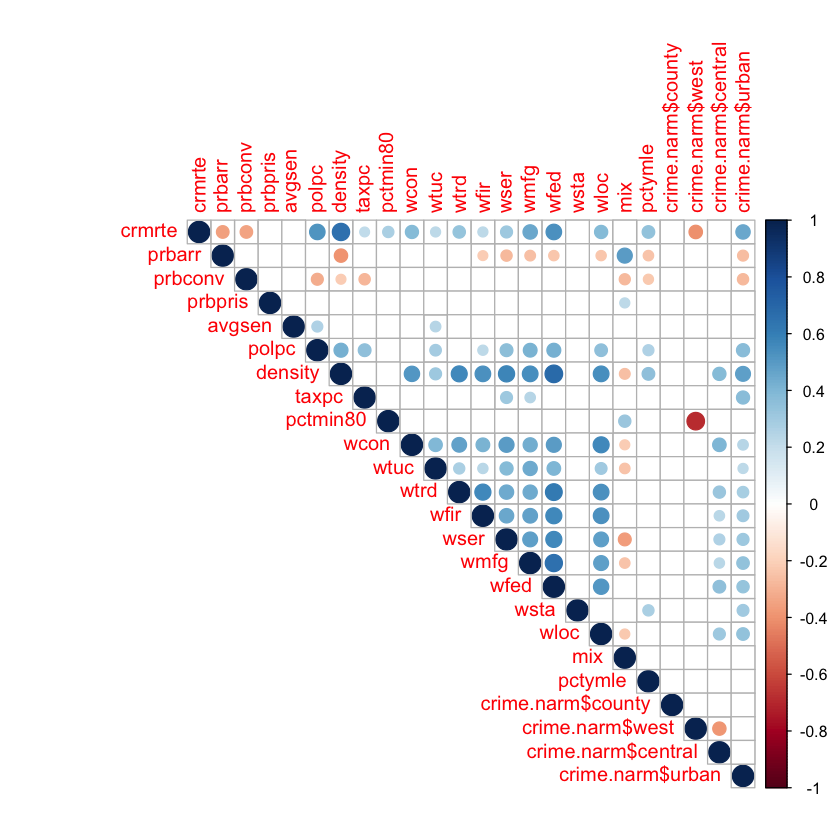

In [21]:
# Plot options
backup_options <- options()
options(backup_options)
# Continuous data
corrplot(cm$r,
         type = "upper",
        #order='hclust',
         p.mat = cm$P,
         sig.level = 0.05,
         insig = "blank")

**Figure 1b. Relationships between crime and continuous variables that are highly correlated with crime rates: police per capita and density.**

Note that crime rates are especially high in urban (red points) areas and low in western (black points) areas compared to the inverse. There are very clear and relatively steep relationships between log(*crmrte*) & log(*density*) and log(*crmrte*) & log(*polpc*). There are two outliers, *sensu lato*, from rows 51 and 79. The former is an outlier if log(*polpc*) is regessed on log(*crmrte*)- it may *pull* the slope towards 0. The latter observation is likely influential (see Cook's distance discussion below) if log(*density*) is regressed on log(*crmrte*). Finally, when the outliers are removed the slopes appear more linear than when the outlier was included. These outliers are inspected in detail in the appendix.

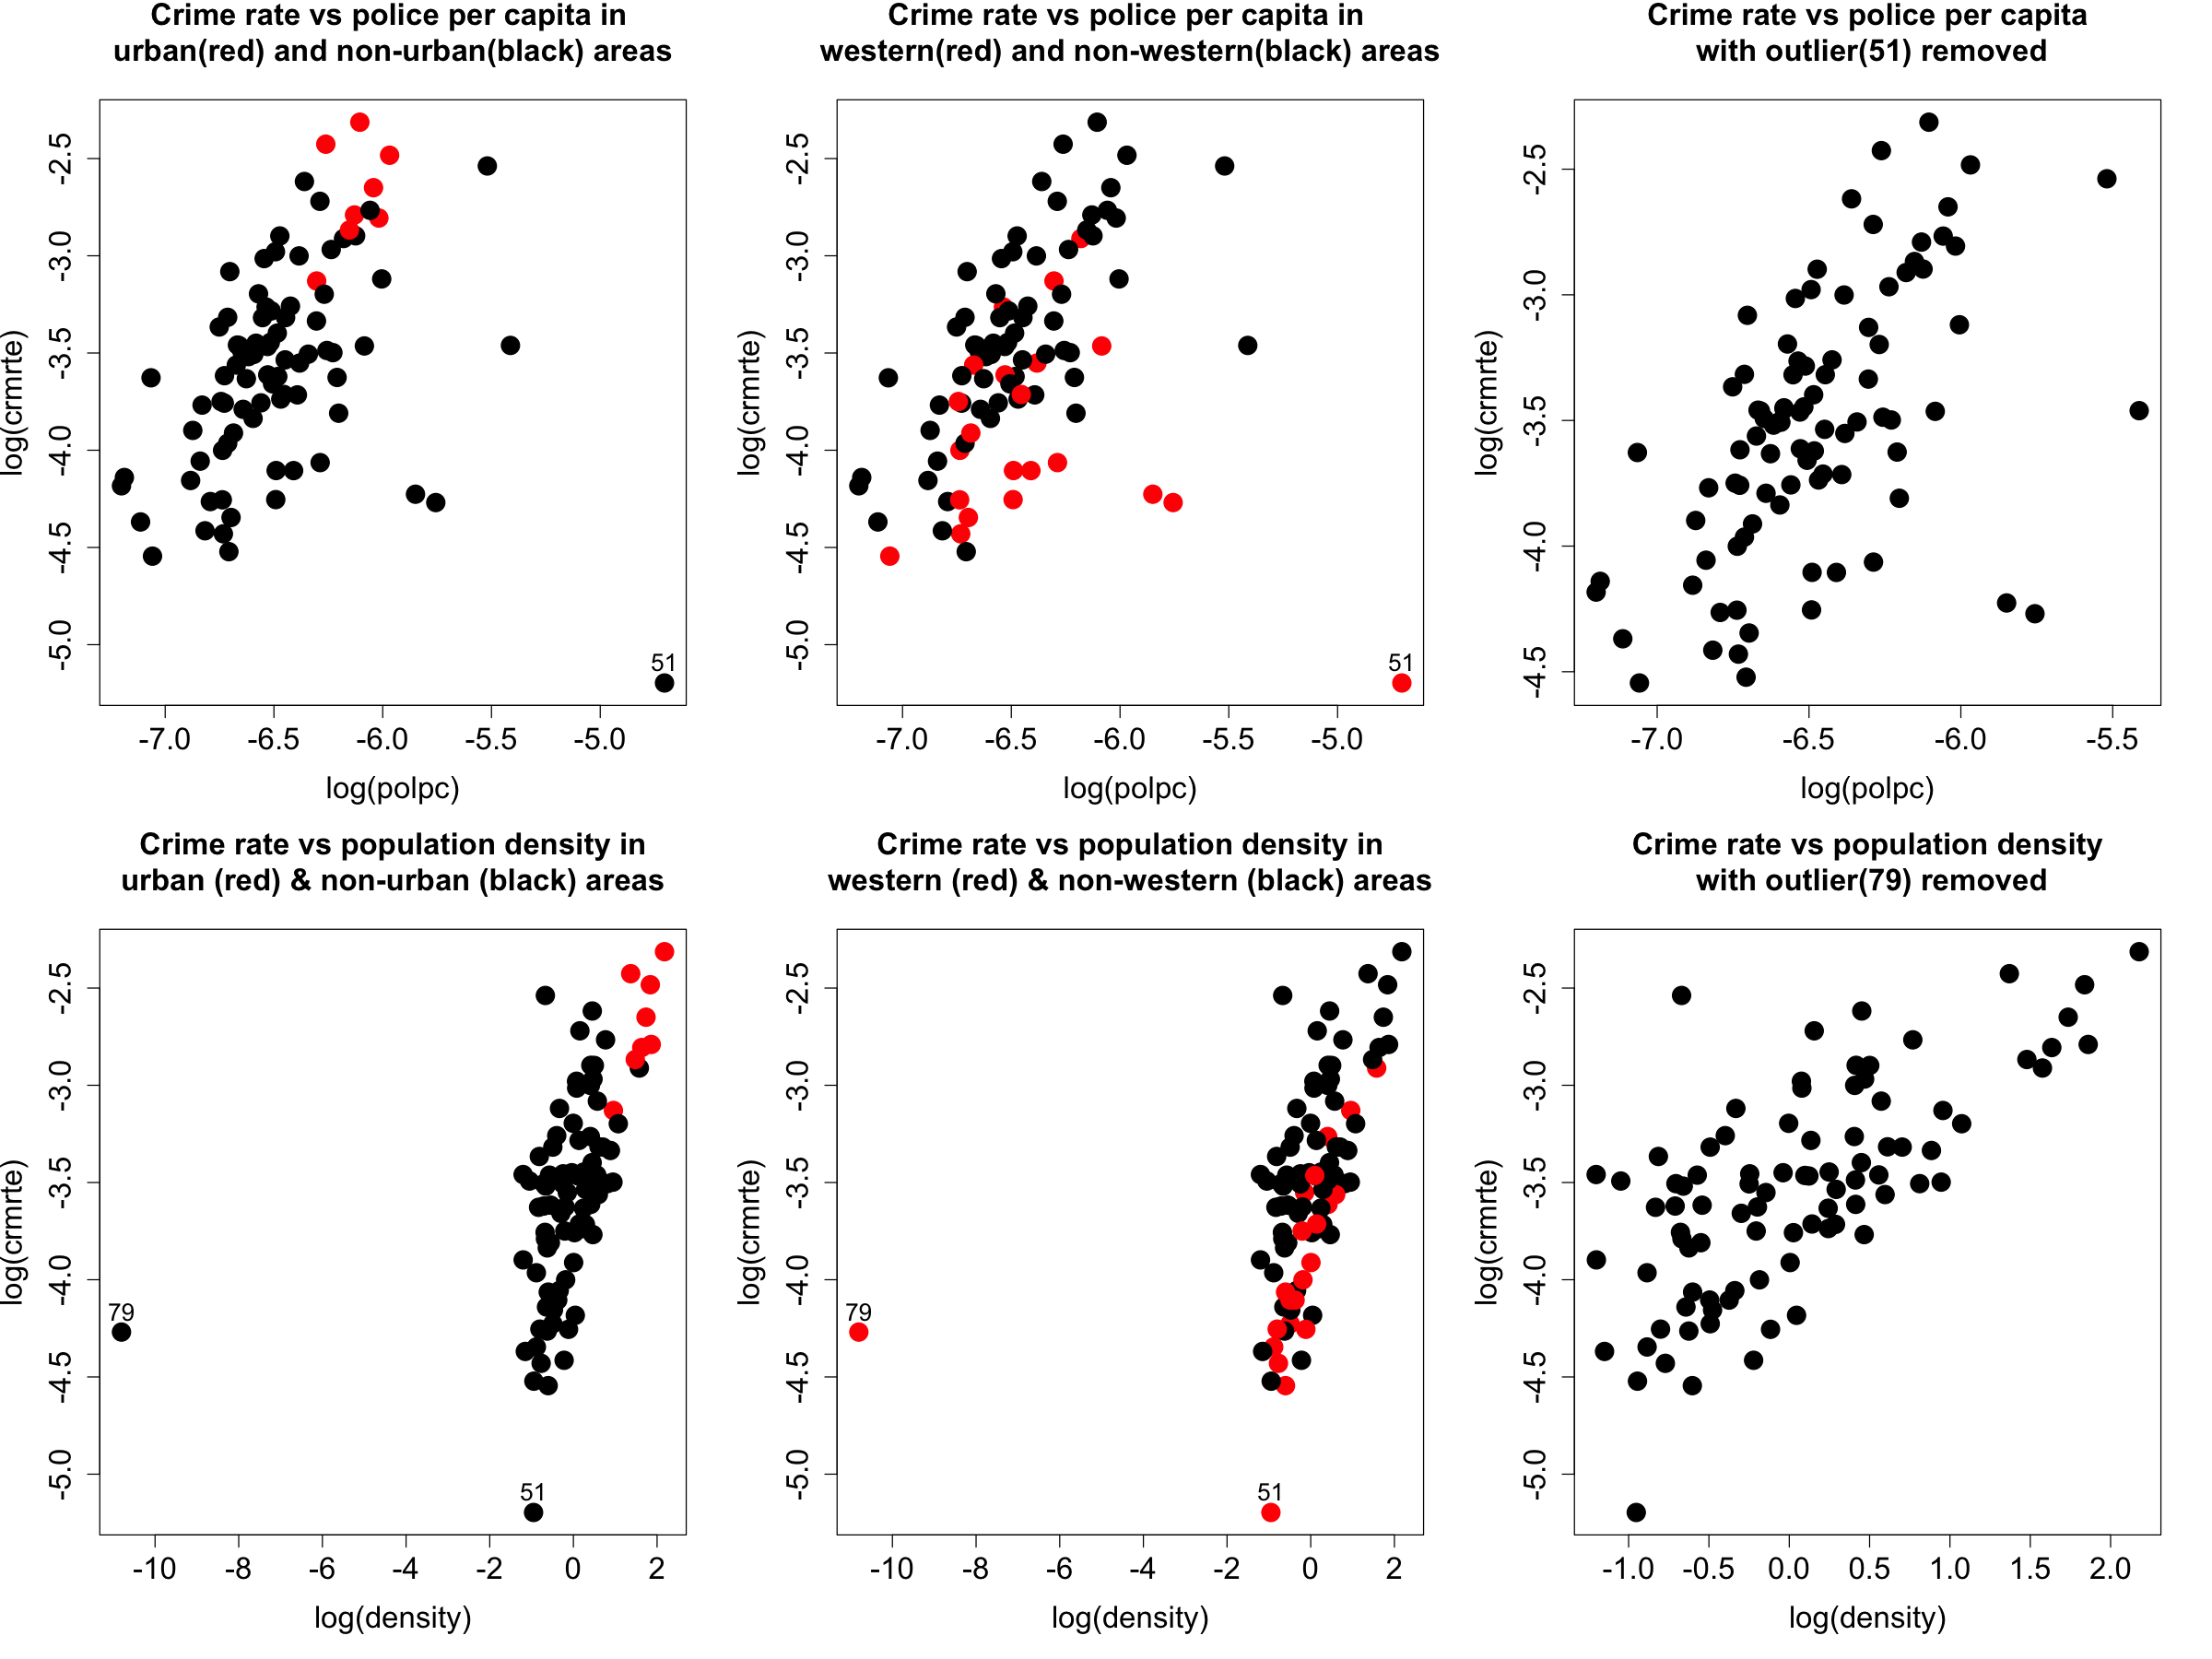

In [22]:
# Plot conditions
par(mfrow = c(2,3))
options(repr.plot.height = 15,
        repr.plot.width = 20,
        repr.plot.pointsize = 20)

# Crime rate vs polpc | urban
plot(log(crime.narm$crmrte)~log(crime.narm$polpc),
    cex=2,pch=19,col=crime.narm$urban,
    cex.main=2.5,cex.axis=2.5,cex.lab=2.5,
    main= "Crime rate vs police per capita in \
urban(red) and non-urban(black) areas\n",
    ylab="log(crmrte)",xlab="log(polpc)")
text(log(crime.narm$crmrte)~log(crime.narm$polpc),
     labels = ifelse(log(crime.narm$polpc) > -5,
     row.names(crime.narm), NA),
     pos=3,cex=2)

# Crime rate vs polpc | west
plot(log(crime.narm$crmrte)~log(crime.narm$polpc),
    cex=2,pch=19,col=crime.narm$west,
    cex.main=2.5,cex.axis=2.5,cex.lab=2.5,
    main= "Crime rate vs police per capita in \
western(red) and non-western(black) areas\n",
    ylab="log(crmrte)",xlab="log(polpc)")
text(log(crime.narm$crmrte)~log(crime.narm$polpc),
     labels = ifelse(log(crime.narm$polpc) > -5,
     row.names(crime.narm), NA),
     pos=3,cex=2)

# Crime rate vs polpc | no outlier
plot(log(crime.narm[-51,2])~log(crime.narm[-51,7]),
    cex=2,pch=19,col="black",
    cex.main=2.5,cex.axis=2.5,cex.lab=2.5,
    main= "Crime rate vs police per capita\n with outlier(51) removed\n",
    ylab="log(crmrte)",xlab="log(polpc)")

# Crime rate vs density |urban
plot(log(crime.narm$crmrte)~log(crime.narm$density),
    cex=2,pch=19,col=crime.narm$urban,
    cex.main=2.5,cex.axis=2.5,cex.lab=2.5,
    main= "Crime rate vs population density in\
urban (red) & non-urban (black) areas\n",
    ylab="log(crmrte)",xlab="log(density)")
text(log(crime.narm$crmrte)~log(crime.narm$density),
    labels = ifelse(log(crime.narm$density) < -8 |
                    log(crime.narm$crmrte) < -5,
    row.names(crime.narm), NA),
    pos=3,cex=2)

# Crime rate vs density | west
plot(log(crime.narm$crmrte)~log(crime.narm$density),
    cex=2,pch=19,col=crime.narm$west,
    cex.main=2.5,cex.axis=2.5,cex.lab=2.5,
    main= "Crime rate vs population density in\
western (red) & non-western (black) areas\n",
    ylab="log(crmrte)",xlab="log(density)")
text(log(crime.narm$crmrte)~log(crime.narm$density),
    labels = ifelse(log(crime.narm$density) < -8 |
                    log(crime.narm$crmrte) < -5,
    row.names(crime.narm), NA),
    pos=3,cex=2)

# Crime rate vs density | no outlier
plot(log(crime.narm[-79,2])~log(crime.narm[-79,8]),
    cex=2,pch=19,col="black",
    cex.main=2.5,cex.axis=2.5,cex.lab=2.5,
    main= "Crime rate vs population density\n with outlier(79) removed\n",
    ylab="log(crmrte)",xlab="log(density)")



**Figure 1c: Relationship between crime and categorical variables.**

Note that crime rates differ between western & not-western and urban & not urban regons in North Carolina (N.C). Also note the unbalanced sampling sizes for urban vs non-urban regions. For central N.C, crime rates look comparable within regions. Finally, note that the crime rate from county 51 is unexpectedly low.

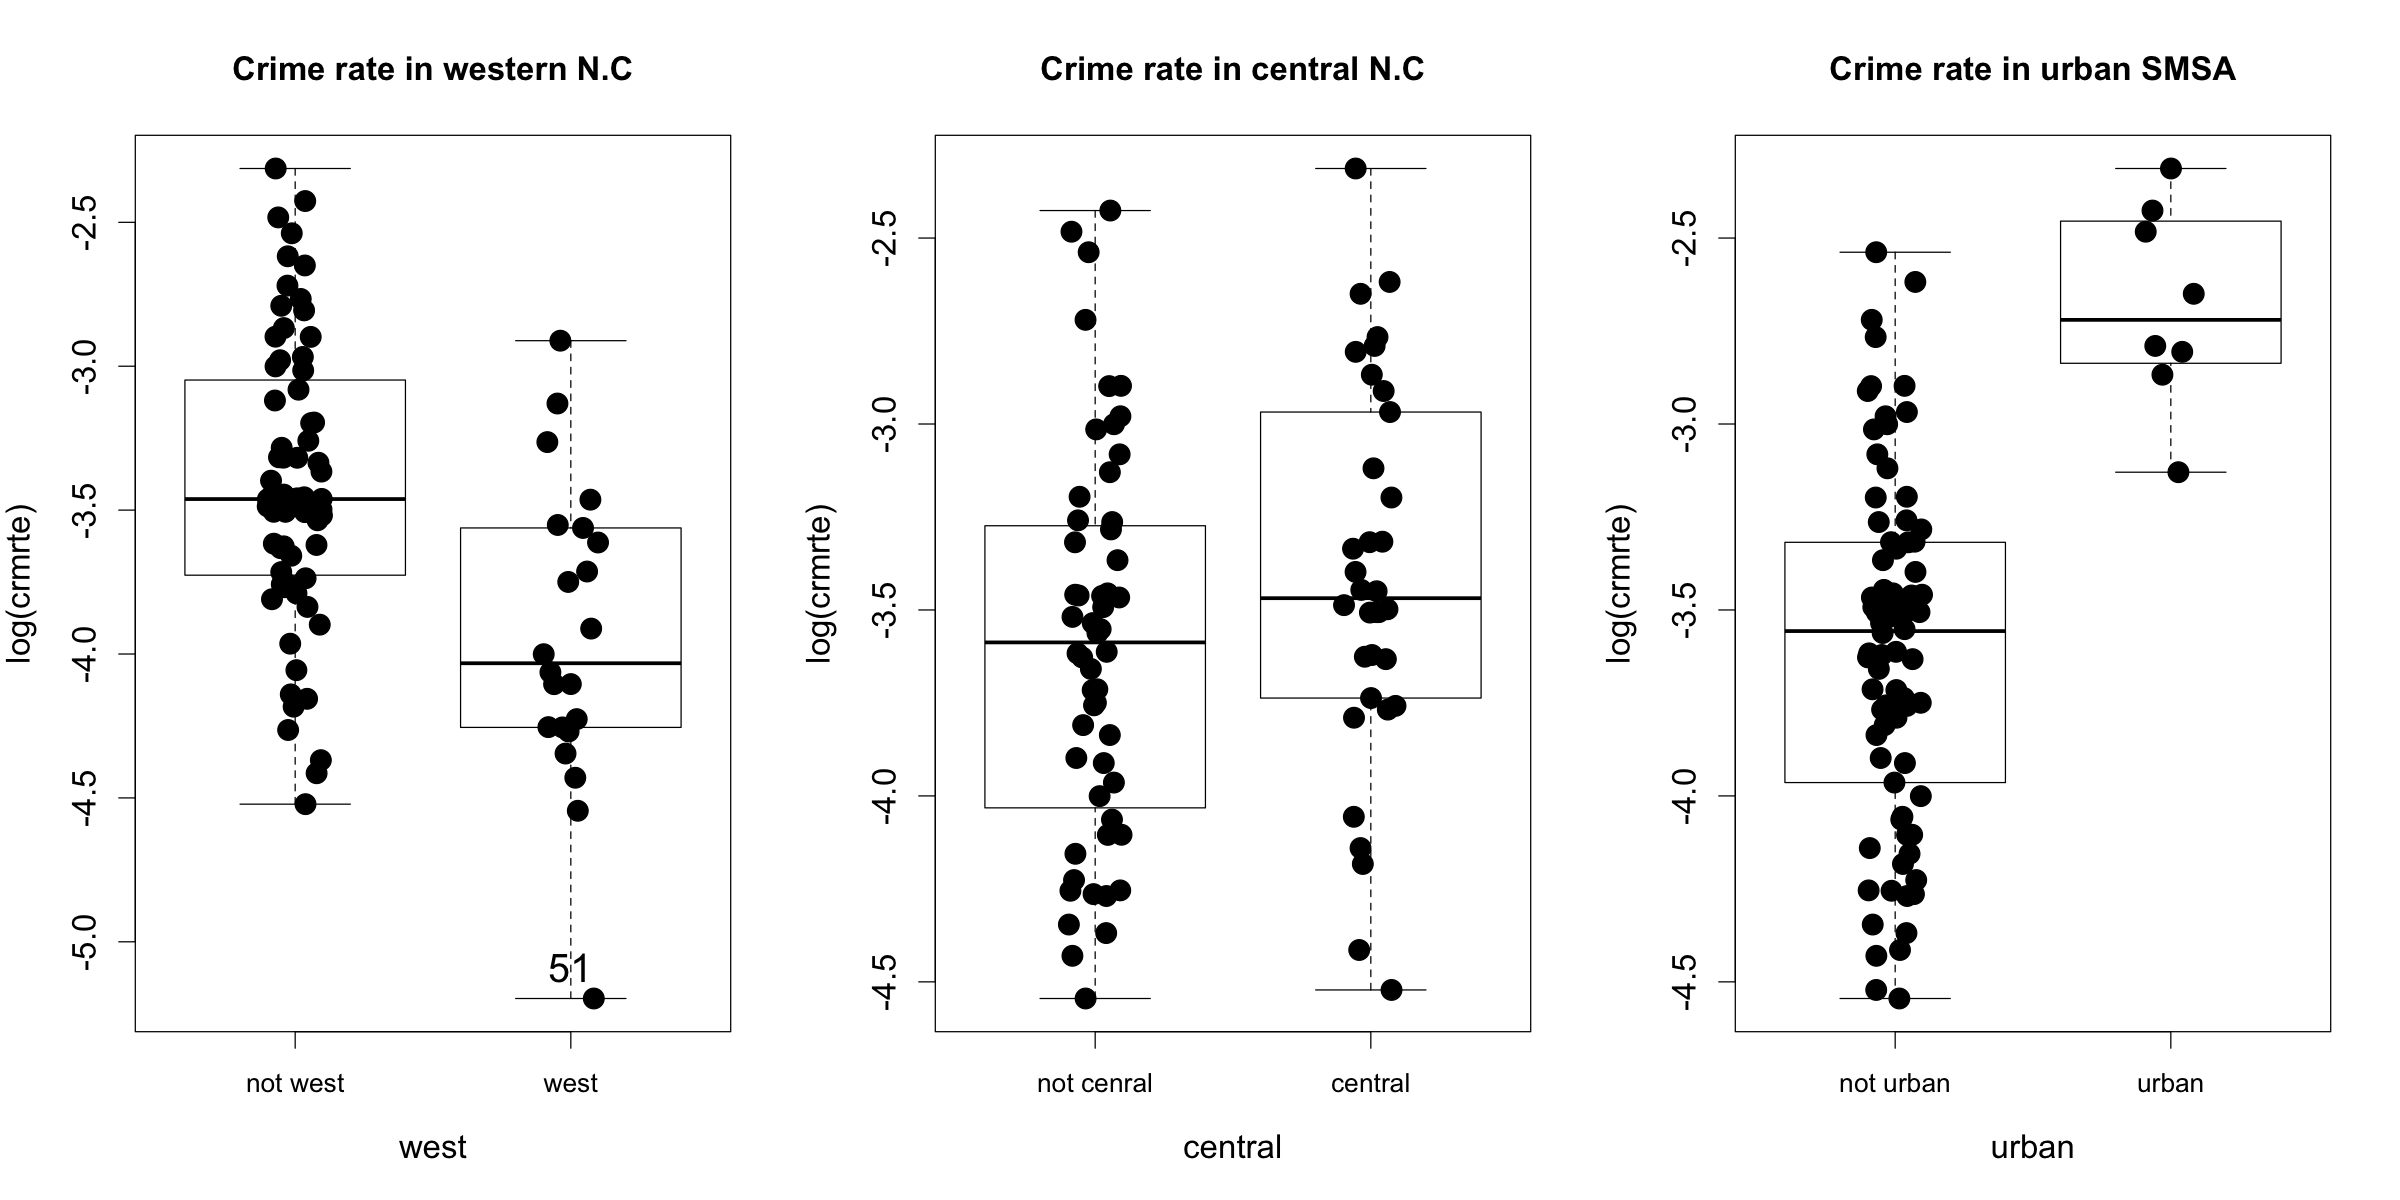

In [23]:
# Plot conditions
par(mfrow = c(1,3))
options(repr.plot.height = 10,
        repr.plot.width = 20,
        repr.plot.pointsize = 25)

# Crime in western NC
boxplot(log(crime.narm$crmrte) ~ as.numeric(crime.narm$west),
        cex=1.5, pch=19, xaxt='n', cex.main=2.5, cex.axis=2.5, cex.lab=2.5, outline=F,
        main= "Crime rate in western N.C",
        ylab="log(crmrte)",xlab="west")
stripchart(log(crime.narm$crmrte) ~ as.numeric(crime.narm$west),
           vertical = TRUE, method="jitter", add=TRUE,
           cex=2.5, pch=20, col='black')
text(log(crime.narm$crmrte)~as.numeric(crime.narm$west),
     labels = ifelse(log(crime.narm$crmrte) < -5,
                     row.names(crime.narm), NA),
     pos=3, cex=3)
axis(1, at=c("1", "2"), labels=c("not west","west"),cex.axis=2)

# Crime in central NC
boxplot(log(crime.narm$crmrte) ~ as.numeric(crime.narm$central),
        cex= 1.5, pch=19,xaxt = 'n',cex.main=2.5,cex.axis=2.5,cex.lab=2.5, outline=F,
        main= "Crime rate in central N.C",
        ylab="log(crmrte)",xlab="central")
stripchart(log(crime.narm$crmrte) ~ as.numeric(crime.narm$central),
           vertical = TRUE, method="jitter", add=TRUE,
           cex=2.5, pch=20, col='black')
text(log(crime.narm$crmrte)~as.numeric(crime.narm$central),
    labels = ifelse(log(crime.narm$crmrte) < -5,
    row.names(crime.narm), NA),
    pos=3, cex=3)
axis(1, at=c("1", "2"), labels=c("not cenral","central"),cex.axis=2)

# Crime in urban NC
boxplot(log(crime.narm$crmrte) ~ as.numeric(crime.narm$urban),
        cex= 1.5, pch=19, xaxt='n', cex.main=2.5, cex.axis=2.5, cex.lab=2.5,outline=F,
        main= "Crime rate in urban SMSA",
        ylab="log(crmrte)",xlab="urban")
stripchart(log(crime.narm$crmrte) ~ as.numeric(crime.narm$urban),
           vertical = TRUE, method="jitter", add=TRUE,
           cex=2.5, pch=20, col='black')
text(log(crime.narm$crmrte)~as.numeric(crime.narm$urban),
    labels = ifelse(log(crime.narm$crmrte) < -5,
    row.names(crime.narm), NA),
    pos=3, cex=3)
axis(1, at=c("1", "2"), labels=c("not urban","urban"),cex.axis=2)

**Summary**

From the exploratory data analysis above we learned that, despite several anomalous observations, all but 7 candidate explanatory variables are correlated with crime rate. Of those variables variables, we will use (i) the 3 variables that we think politicians can influence as key variables in our models, (ii) covariates of interest that might improve model fit and enable use to control for other sources of variability, and (ii) all remaining variables to assess the robustness of our models. 

# Main Analysis <a class="anchor" id="third-q"></a>  
[Back to Table of Contents](#toc-q)

3. Main Analysis
    - Clearly state how you _identify_ the key parameters necessary to evaluate your hypothesis
        - Present simple regression model as an equation
        - Discuss how you estimate the parameters and the variance of the parameter estimates
            - Sufficient to describe in words
    - Present main regression table and interpret results
        - Direction, size, significance of parameters
        - Model fit
    - Evaluate your hypothesis
        - Statistical and practical significance

**For inferential analysis, we would like to achieve 3 goals**

1. The Model 1 will only includes the explanatory variables of key interest and no other covariates. 

1. The Model 2 will includes the covariates to find to balance between parsimony and accuracy and control for other sources of variation.

3. The Model 3 will includes all explanatory variables and demonstrates the robustness of our model specification and results.


**Model 1: Model with only key variables of interest (m_key)**

$\ln {(crmrte)} = \beta_0 + \beta_{polpc} \ln {(polpc)} + \beta_{prbarr} \ln {(prbarr)} + \beta_{prbconv} \ln {(prbconv)} + \beta_{prbarr*prbconv} \ln {(prbarr)} \cdot \ln {(prbconv)} + u$

In [24]:
m_key <- lm(log(crmrte) ~ log(polpc) + log(prbarr) + log(prbconv) 
                        + log(prbconv)*log(prbarr), data = crime.narm)

*Test whether interaction between prbconv and prbarr could be dropped*

Null hypothesis: interaction between prbconv and prbarr could not be dropped
* $H_0$: $\beta_{prbconv} prbconv \cdot prbarr =0$

Alternative hypothesis: interaction between prbconv and prbarr could be dropped

* $H_{A}$: $\beta_{prbconv} prbconv \cdot prbarr \neq 0$

In [25]:
# Hypothesis - H_0: Test whether all male interactions could be dropped
H0 = c("log(prbarr):log(prbconv) = 0")
# Wald/F test
linearHypothesis(
    m_key, H0, 
    vcov=vcovHC(m_key), 
    singular.ok=TRUE
)

Res.Df Df F         Pr(>F)   
1 86     NA        NA        NA
2 85      1 0.2653271 0.6078207

> We failed to reject the null hypothesis ($H_0$: $\beta_{prbconv} prbconv \cdot prbarr = 0$). Therefore, the interaction between *prbarr* and *prbconv* could not be dropped from the model.

**Model 2: A Model with key variables plus covariates (m_asscociated)**

$\ln {(crmrte)} = \beta_0 + \beta_{polpc} \ln {(polpc)} + \beta_{prbarr} \ln {(prbarr)} + \beta_{prbconv} \ln {(prbconv)} + \beta_{prbarr*prbconv} \ln {(prbarr)}* \ln {(prbconv)} +  \beta_{prbpris} \ln {(prbpris)} + \beta_{avgsen} {avgsen} +  \beta_{west}west + \beta_{urban}urban + \beta_{taxpc} \ln {(taxpc)} + \beta_{wfed} \ln {(wfed)} + \beta_{density} \ln {(density)} + u$

In [26]:
m_associated <- lm(log(crmrte) ~ log(polpc) + log(prbarr) + log(prbconv) 
                               + log(prbarr)*log(prbconv) + 
                               + log(prbpris) + avgsen +
                               + log(taxpc) + log(wfed) +
                               + factor(west) + factor(urban) + log(density), data = crime.narm)

**Model 3: A Model all variables (m_all)**

$\ln {(crmrte)} = \beta_0 + \beta_{density} \ln {(density)} + \beta_{polpc} \ln {(polpc)} + \beta_{wfed} \ln {(wfed)} + \beta_{wcon} \ln {(wcon)} + \beta_{wtuc} \ln {(wtuc)} + \beta_{wtrd} \ln {(wtrd)} + \beta_{wfir} \ln {(wfir)} + \beta_{wser} {(wser)} + \beta_{wmfg} {(wmfg)} + \beta_{wsta} \ln {(wsta)} + \beta_{wloc} \ln {(wloc)} + \beta_{prbarr} \ln {(prbarr)} + \beta_{prbconv} \ln {(prbconv)} + \beta_{prbpris} \ln {(prbpris)} + \beta_{avgsen} {avgsen} +  \beta_{west}west + \beta_{urban}urban + \beta_{central}central + \beta_{pctmin80}\ln {(pctmin80)} + \beta_{pctymle} \ln {(pctymle)} + \beta_{mix} \ln {(mix)} + \beta_{taxpc} \ln {(taxpc)} + u$

In [27]:
m_all <- lm(log(crmrte) ~ log(polpc) + log(prbarr) + log(prbconv) 
                                  + log(prbpris) + avgsen + log(taxpc)
                                  + factor(west) + factor(urban) + factor(west)
                                  + log(wfed) + log(wcon) + log(wtuc)
                                  + log(wtrd) + log(wfir) + log(wser)
                                  + log(wmfg) + log(wsta) + log(wloc)
                                  + log(density) + log(pctmin80) + log(pctymle)
                                  + log(mix), data = crime.narm)

**Robust standard errors**

Covariance matrix was applied for estimating a robust covariance matrix of variables.

In [45]:
# Compute robust standard errors
se.m_key = sqrt(diag(vcovHC(m_key)))
se.m_associated = sqrt(diag(vcovHC(m_associated)))
se.m_all = sqrt(diag(vcovHC(m_all)))

**AIC**

In [51]:
# Compute AIC values
m_key$AIC <- AIC(m_key)
m_associated$AIC <- AIC(m_associated)
m_all$AIC <- AIC(m_all)

**Table 3: Regression table. The coefficients, robust standard errors, and $p$-values, and adjusted-$R^2$ are presented below.**

Stargazer package was used to generate regression table. Coefficients are interpreted below.

In [52]:
# We pass the standard errors into stargazer through the se argument.
stargazer(m_key, m_associated, m_all,
          type = "text",
          keep.stat=c("n", "adj.rsq", "aic"),
          se = list(se.m_key, se.m_associated, se.m_all),
          column.labels = c("key", "associated", "all"),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                               Dependent variable:      
                         -------------------------------
                                   log(crmrte)          
                            key     associated    all   
                            (1)        (2)        (3)   
--------------------------------------------------------
log(polpc)                 0.296      0.341     0.507*  
                          (0.403)    (0.388)    (0.235) 
                                                        
log(prbarr)                -0.542     -0.357   -0.512***
                          (0.678)    (0.494)    (0.136) 
                                                        
log(prbconv)               -0.032     -0.103    -0.293* 
                          (1.021)    (0.748)    (0.137) 
                                                        
log(prbpris)                          -0.214    -0.315  
                                     (0.261)    (0.217) 
                              

> The accuracy of prediction increased when all covariates were incorporated. The OLS model with covariates shows adjusted $R^2=0.709$ in the comparison to the model with only key exploratory variables ($R^2=0.474$). In addition, even though the model with all variables provided the best prediction ($R^2=0.790$), the risk of model overfitting and the cost (e.g. computing power, data collection, etc) are increased at the same time.

**Interpretation of coefficients of Model 1 (m_key model):**

   * $\beta_{polpc}$: For each one percent increase in the log-transformed weekly wages of federal employees (*log(polpc)*), log-transformed crime rate increases by 0.296%. This coefficient is not statistically and practically significant. The $p$-value associated with $H_0$: $\beta_{polpc} = 0$ is $p > 0.05$- the slope is different from 0. 
   
   * $\beta_{prbarr}$: For each one percent increase in the log-transformed 'probability' or propensity to be arrested (*log(prbarr)*), the log-transformed crime rate decreases by 0.542%. *prbarr* is faliled to satisfy the axioms of probability theory. This coefficient is not statistically and practically significant. The $p$-value associated with $H_0$: $\beta_{prbarr} = 0$ is $p > 0.05$- the slope is different from 0. From a practical perspective, this coefficient represents a small but perhaps important decrease in crime rates/person. Perhaps people are less likely to commit a crime if they are more likely to be arrested or more afraid of being arrested.
   
   * $\beta_{prbconv}$: For each one percent increase in the log-transformed percent minority (*log(pctmin80)*), the log-transformed crime rate increases by 0.216%. This coefficient is a statistically and practically significant explanatory variable. The $p$-value associated with $H_0$: $\beta_{pctmin80} = 0$ is $p < 0.001$- the slope is different from 0. From a practical perspective, this coefficient seems to represent an important driver of crime rates/person. Again, although the response of log(*crmrte*) to log(*pctmin80*) is small, any increase in crime to a victim is personally significant.
   
   * $\beta_{prbarr} \cdot \beta_{prbconv}$: There is an interaction between *log(prbarr)* and *log(prbconv)*. The log-transformed crime rate depends on the relationship between *log(prbarr)* and *log(prbconv)*. In other words, the effect of *log(prbconv)* on *log(crmrte)* depends on the values of *log(prbarr)*. This interaction is positive- the difference between the *log(prbarr)* and *log(prbconv)* slopes is positive. This interaction is statistically and of weak practical significance. The $p$-value associated with $H_0$: $\beta_{prbarr} = \beta_{prbconv} = 0$ is $p < 0.05$- the slopes are different from 0. Although the effect of *log(prbconv)* on *log(crmrte)* depends on the values of *log(prbarr)*, the slopes of the *log(prbarr)* and *log(prbconv)* are only midly positive.
   
   * Finally, the intercept, $\beta_0$, is significant and negative, -13. This large and statisically significant coefficient may provide evidence that we have omitted many variables and the intercept is absorbing the variation of those variables.


**Interpretation of coefficients of Model 2 (m_associated model):**

* From bivariate OLS models of each category, we identified the regressors that rejected null hypothesis $H_0$: $\beta_{j} = 0$ ($p < 0.05$). The coefficients of these regressors are significantly affecting crime rate. However, when we put these variables into one multivariable OLS model, the effects of *taxpc*, *wcon*, *wtrd*, *wfir*, *wmfg*, *wloc*, *west*, and *urban* on crime rate become statistically and practically insignificant ($p > 0.05$). 

* *$\beta_{wfed}$* : For every 1% increase in the weekly wages of federal employees (*log(wfed)*), the crime rate increases 1.038%. This coefficient is statistically and practically significant. The $p$-value associated with $H_0$: $\beta_7 = 0$ is $p < 0.05$- the slope is different from 0. When converted back to the original units, this coefficient represents a 2.8 unit increase in crime rates (crimes committed/person) for every unit increase in weekly wages for federal employees.

* *$\beta_{pctmin80}$* : For every 1% increase in the percent minority (*log(pctmin80)*), the  crime rate increases by 0.206%. This coefficient is a statistically and practically significant explanatory variable. The $p$-value associated with $H_0$: $\beta_10 = 0$ is $p < 0.01$- the slope is different from 0. From a practical perspective, this coefficient seems to represent an important driver of crime rates/person. 

* *$\beta_{prbarr}$* : For every 1% increase in the log-transformed 'probability' or propensity to be arrested (*log(prbarr)*), the log-transformed crime rate decreases by 0.534%. This coefficient is statistically and practically significant. The $p$-value associated with $H_0$: $\beta_{11} = 0$ is $p < 0.001$- the slope is different from 0. From a practical perspective, this coefficient represents a small but perhaps important decrease in crime rates/person. Perhaps people are less likely to commit a crime if they are more likely to be arrested.

* *$\beta_{prbconv}$* : For every 1% increase in the log-transformed 'probability' or propensity to be arrested (*log(prbconv)*), the log-transformed crime rate decreases by 0.453%. This coefficient is statistically and practically significant. The $p$-value associated with $H_0$: $\beta_{12} = 0$ is $p < 0.001$- the slope is different from 0. From a practical perspective, this coefficient represents a small but perhaps important decrease in crime rates/person. Perhaps people are less likely to commit a crime if they are more likely to be serving a sentence in prison.

* Finally, the intercept, $\beta_0$, is significant and negative, -15. This large and statistically significant coefficient may provide evidence that we have omitted many variables and the intercept is absorbing the variation of those variables.

**Interpretation of coefficients of Model 3 (m_all model):**

The m_all model includes all 22 independent variables available in the dataset. Since both the dependent and explanatory variables are log transformed, we can describe the impact of a log-tranformed explanatory variable $\beta_i$ such a A% change in $\beta_i$ (holding all other variables constant) results in an B% change in crime rate. 

* $\beta_{density}$: For every 1% in increase in density, the crime rate increases by 0.132% or to put things in perspective, a 10% increase in population would only result in a 1.2% increase in crime rate which is practically insignificant. This is also statistically insifigicant ($p > 0.05$) and we fail to reject the null hypothesis that the slope is 0 i.e. $H_0$: $\beta_1 = 0$.

* $\beta_{polpc}$: For every 1% in increase in police per capita, the crime rate increases by 0.486%. This is counter intuitive but can be indicative of the fact that when crime increases, more police resources per capita may be deployed and not that more police per capita causes a higher crime rate. The null hypothesis that $H_0$: $\beta_2 = 0$ can be rejected, though it should be noted that the associated $p$ value only satisfies ($p < 0.05$)  

* *Wage coefficients $\beta_{wfed}$, $\beta_{wcon}$, $\beta_{wtuc}$, $\beta_{wtrd}$, $\beta_{wmfg}$, $\beta_{wloc}$, $\beta_{wfir}$, $\beta_{wset}$, and $\beta_{wsta}$* : We see here that when all types of wages are included, any 10% increase in $wfed$, $wcon$, $wtuc$,$wtrd$,$wmfg$ or $wloc$ result in no more than a 6% increase increase in crime rate, with the impact of federal wage being the highest at 5.6% and manufacturing wages having the lowest impact at 0.2% increase in crime rate. In many cases, the impact to crime rate is practically neglible, e.g in the case of manufacturing wages. On the other hand, any 10% increase in $wfir$, $wser$ or $wsta$ is associated with upto a 3.2% decrease in crime rate but again the impact is practically insignificant. Moreover, all the coefficients related to wage are statistically insignificant (each associated p , $p > 0.05$) and we fail to reject the null hypothesis for each of these variables  $H_0$: $\beta_i = 0$ for i = $wfed$, $wcon$, $wtuc$,$wtrd$,$wmfg$,$wloc$, $wfir$, $wser$ or $wsta$.

* *$\beta_{prbarr}$* : For every 10% increase in the 'probability' of arrest, we see that crime rate reduces by 5.36%. This coefficient is statiscally significant and thus reject the null hypothesis $H_0$: $\beta_{prbarr} = 0$ since the associated p value $p < 0.001$. This decrease is also practically significant since their is the potential to impact the crime in an area in an actionable and positive manner. One reason for this negative relation between the independent and explanatory variable may be that once a person is arrested, their opportunity to commit crime is reduced.

* *$\beta_{prbconv}$* : For every 10% increase in the 'probability' (or rather propensity) of convictions, there is 3.18% decrease in crime rate. This coefficient is statiscally significant and thus reject the null hypothesis $H_0$: $\beta_{prbconv} = 0$ since the associated p value $p < 0.05$. This impact of this coefficient may be of small but important practically significant in that perhaps people are less likely to commit a crime if they face the prospect of conviction.

* *$\beta_{prbpris}$* : For every 10% increase in the 'probability' of a prison sentence, there is 3% decrease in crime rate. While this coefficient may of limited practical significance in that prospect of prison time may lead to few crimes being the commited, in this model, this coefficient is statiscally insignificant ($p > 0.05$).

* *$\beta_{avgsen}$* : For every 10% increase in the length of prison sentence, there appears to be a 3.3% decrease in crime rate. While this coefficient may be of practical significance in that perhaps longer the a prison sentences provide less opportunities to commit crime or even that the experience of prison deters recidivism, in this model $\beta_{avgsen}$ coefficient is statiscally insignificant ($p > 0.05$).

# Diagnostics <a class="anchor" id="fourth-q"></a>  
[Back to Table of Contents](#toc-q)

**Figure 2a: diagnostic plots for model with all explanatory variables**

Note that these plots will be discussed below.

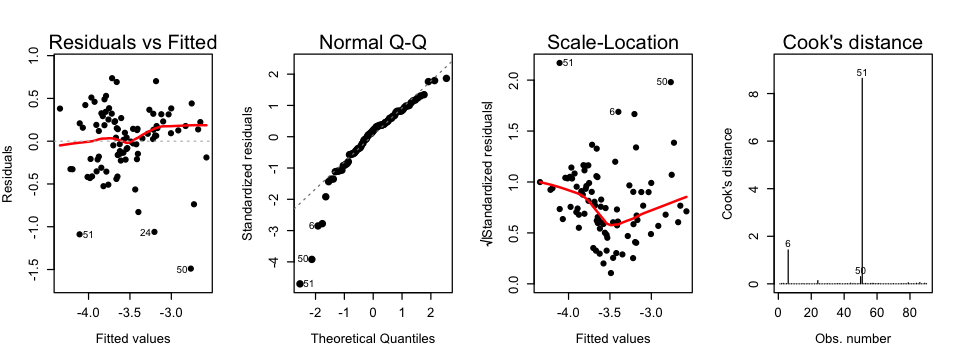

In [30]:
options(repr.plot.height = 3, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1,4))
plot(m_key, which=1, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_key, which=2, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_key, which=3, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_key, which=4, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=1)

**Figure 2b: diagnostic plots for model with only explanatory variables of interest**

Note that these plots will be discussed below.

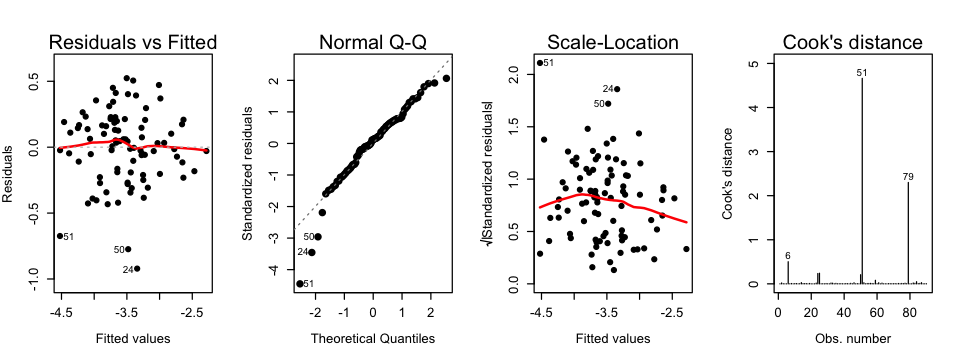

In [31]:
options(repr.plot.height = 3, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1,4))
plot(m_associated, which=1, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_associated, which=2, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_associated, which=3, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_associated, which=4, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=1)

**Figure 2c: diagnostic plots for model with only key explanatory variables**

Note that these plots will be discussed below.

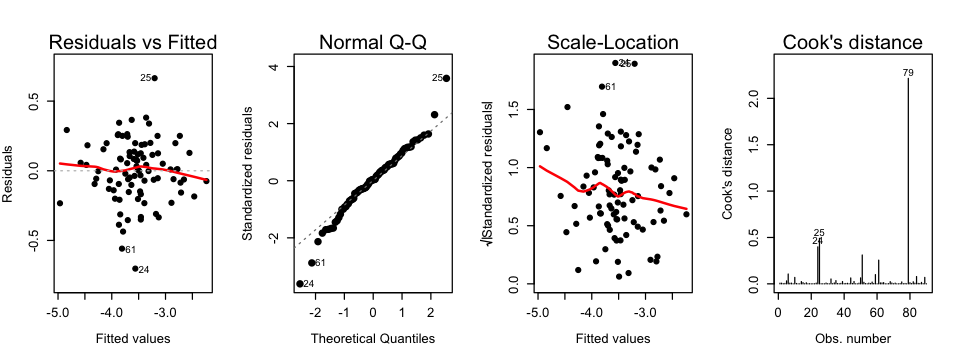

In [32]:
options(repr.plot.height = 3, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1,4))
plot(m_all, which=1, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_all, which=2, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_all, which=3, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=2)
plot(m_all, which=4, pch=19, cex=1, cex.lab=1, cex.main=4, lwd=1)

**Summary of diagnostic plots and assumptions for all three models:  m_all, m_associated, and m_key**

1. **Linear in parameters**
   * As seen in our models above, all of our models are linear and additive in the parameters, the $\beta_0, \beta_1,... \beta_k$
2. **Random sampling**
   * We assume that are $n$ observations, {$(x_{i1},x_{i2},...,x_{ik},y_i):i=1,2,...,n$} are independent and identically distributed, $iid$. It is possible that this assumption is violated but it is difficult to know with certainly from the information provided.
3. **No perfect collinearity**
   * As documented in the scatterplot matrices below (**Figs A3-A6**) and those in the appendix, there is no *perfect* collinearity. Although, there are certainly explantory variables that are correlated, these variables are not *perfectly* correlated. $\therefore$ the explanatory variables are not redundant. The models we built and the inferences we draw therefrom do not suffer from the consequences of multicollinearity.
4. **Zero-conditional mean**
   * The zero-conditional mean assumption, $E(u|x_1, x_2,...,x_k) = 0$ is not satisfied, *sensu stricto*, for any of the models presented above. The residual versus fitted values plots (**Figs 2a-c**) document the extent to which these models violate this assumption. If the zero mean assumption were satisfied then we should expect to see a horizontal red line, centered at zero (ASYNC lecture 12.5). In contrast we see that our estimates of $u$, the residuals, deviate from this expectation, especially for m_key and m_all. 
5. **Homoskedasticity**
   * Homoskedasticity does not appear to be satisfied for all models presented above. Evidence for heteroskedasticity is provided by plots and Breusch-pagan tests, below. When **figures 2a-c** are inspected, we see minor to acute violations of this assumption in the residual versus fitted value plots (**Figs 2a-c**) and the scale-location plots. If variances were homoskedastic we should see uniform horizontal bands across these plots. However, note that, especially in the m_associated and m_key models, we see non-constant variablility in the residuals and standarized residuals across the range of fitted values. Likewise, Breusch-pagan tests for each model rejected the $H_0$: residuals are homoscedastic. Since we did not satisfy this assumption, remedial measures were deployed. More specifically, robust standard errors were used below.
   
**Note about outliers and their influence**

* From **figures 2a-c** above we can see values with large residuals, large standardized residuals, and two observations, 51 and 79, with large Cook's distance (as noted in ASYNC lecture 11.10) that is greater than 1. Given that we have no evidence that these observatons were recorded incorrectly, we will keep these observations in the dataframe, despite their influence on the regression surface.

**Breusch Pagan test for homoscedasticity**

$H_0$: residuals are homoscedastic

Squared residuals are regressed on explanatory variables

In [40]:
# m_key
bp_key = lm(m_key$residuals**2 ~ log(polpc) + log(prbarr) + log(prbconv) 
                        + log(prbconv)*log(prbarr), data = crime.narm)
# m_associated
bp_assoc = lm(m_key$residuals**2 ~ log(polpc) + log(prbarr) + log(prbconv) 
                               + log(prbarr)*log(prbconv) + 
                               + log(prbpris) + avgsen +
                               + log(taxpc) + log(wfed) +
                               + factor(west) + factor(urban) + log(density), data = crime.narm)
# m_all
bp_all = lm(m_key$residuals**2 ~ log(polpc) + log(prbarr) + log(prbconv) 
                                  + log(prbpris) + avgsen + log(taxpc)
                                  + factor(west) + factor(urban) + factor(west)
                                  + log(wfed) + log(wcon) + log(wtuc)
                                  + log(wtrd) + log(wfir) + log(wser)
                                  + log(wmfg) + log(wsta) + log(wloc)
                                  + log(density) + log(pctmin80) + log(pctymle)
                                  + log(mix), data = crime.narm)

Test statistics

In [42]:
# m_key
bpts_k = nobs(bp_key) * summary(bp_key)$r.squared
paste("Breusch-Pagan test-statistic:", bpts_k)
# m_associated
bpts_as = nobs(bp_assoc) * summary(bp_assoc)$r.squared
paste("Breusch-Pagan test-statistic:", bpts_as)
# m_all
bpts_al = nobs(bp_all) * summary(bp_all)$r.squared
paste("Breusch-Pagan test-statistic:", bpts_al)

[1] "Breusch-Pagan test-statistic: 11.0058263780772"

[1] "Breusch-Pagan test-statistic: 24.2752619331665"

[1] "Breusch-Pagan test-statistic: 37.4205416315331"

df

In [43]:
# m_key
bpdf_k = length(bp_key$coefficients) - 1
# m_associated
bpdf_as = length(bp_assoc$coefficients) - 1
# m_all
bpdf_al = length(bp_all$coefficients) - 1

$p$-value

In [44]:
# m_key
paste("p-value:", 
      1-pchisq(bpts_k, bpdf_k))
# m_associated
paste("p-value:", 
      1-pchisq(bpts_as, bpdf_as))
# m_all
paste("p-value:", 
      1-pchisq(bpts_al, bpdf_al))


[1] "p-value: 0.0264986118703746"

[1] "p-value: 0.0116213319034999"

[1] "p-value: 0.0150557449473256"

As noted above, since the assumption of homoscedasticity was not satisfied, robust standard errors were used (as recommended in ASYNC, unit 12).

# Robustness <a class="anchor" id="fifth-q"></a>  
[Back to Table of Contents](#toc-q)

4. Robustness
    - Extend your model
        - Control for other regressors (interactions/transormations)
        - Present findings in one regression table
            - Short comment on which model appear to best fit the data
        - Discuss implications for
            - main parameter of interest
            - hypothesis
    - Omitted variable bias
        - Discuss variables that you _do not observe_ but that you _believe_ to be important 
        - Discuss (guesstimate) size and direction of bias
    - Causality
        - pooled (/cross-sectional) data is not great for assuming causal findings
        - Only the experiment can allow you to (perhaps) infer causality

### Omitted Variable Bias:

As we can see, our preferred model m_key includes several variables that have an effect on the crime rate (*wfed, prbarr, prbconv, pctmin80*). Moreover, the Adjusted $R^2 = 0.726$ indicates that nearly $73$% of the variation in crime rate can be explained by the explanatory variables we have chosen for the model. Even in the all inclusive model m_all, the additional explanatory variables explain an additional $6.5$% of variation in crime rate. This leaves 20% of the variation in crime unexplained due to variables we either cannot measure or have access to. Here we will discuss a few such possible variables, 

- $\textbf{Poverty : }$ In and of itself, higher poverty may not necessarily cause an increase in crime rates. However, poverty and the lack of steady income, especially at a level needed to cover basic living needs may drive individuals towards crime to make ends meet or acquire material items they may be able to access otherwise. While the dataset provides information on wage, it does not provide a benchmark of the poverty line, which would allow us to compare how the poverty from county to county. Moreover, impoverished communities tend to have less access to quality education and thus better careear opportunities which can otherwise lead to more financial stability. In this case, the poverty is most closely correlated (negatively) to the wages (higher poverty leads to lower wages) and postively correlated to crime rate (higher poverty leads to higher crime rates). Thus, by omitting poverty, we can potentially under estimate the impact of wages on crime rates  

- $\textbf{Education : }$ Education can have impact on crime rates as well in that better education leads to better and steady employment opportunities which can in turn impact income. Similar to poverty, education is positively correlated to the wages (higher edcuation leads to higher wages) and negatively correlated to crime rate (higher edcuation leads to lower crime rates). Thus, by omitting education, we can potentially under estimate the impact of wages on crime rates. By measuring the impact of education on crime rates, policies can be implemented to ensure proper funding and resources are given to improve education in disadvantaged communities. We should point out that in certain cases, highly education people will still commit common crimes though they may also commit other types of crimes such as tax fraud, embezzlement etc.

- $\textbf{Type of crime : }$ We believe knowing the type of crime is an important factor that has not been captured. The 'Offense mix' variable is defined as the ratio of crimes involving "face-to-face" contact (such as robbery, assault and rape) to those that do not, but this variable does not give more granular information.  As can be seen, $'mix'$ was dropped from the final model m_key. If we have capture the type of assualt in a factored variable, public officials can focus attention to specific solutions. e.g. if assaults involving a deadly weapon are most common, this could lead to policy changes involving better gun control or if sexual assault is the most pressing issue, then specific community outreach and educational programs may be introduced.  

- $\textbf{Day of week / Time of Day : }$ Knowing when and where crimes occur most frequently can help public safety officials plan effectively and better allocate resources. This missing variable can potentially bias the 'county' explanatory variable though the direction of the bias is a bit unclear.

- $\textbf{Location : }$ Again, if we have better knowlegde of where the felonies are occuring (indoors / outdoors / type of location / intersection) can also help public safety officials curb crime by focusing on problem areas. e.g. if the data shows that criminal transactions are occuring at abandoned buildings more so than street intersections, policies can be implemented to better deal vacant properties, perhaps even convert them into spaces that postively impact the community. Again, this variable is potentially correlated to the 'county' variable.

# Conclusions <a class="anchor" id="sixth-q"></a>  
[Back to Table of Contents](#toc-q)

5. Conclusion
    - Summarize main finding
    - Summarize whether main finding is robust to alternative model specifications and/or omitted variable bias
    - State your final verdict
        - Based on your report, do you believe that your hypothesis holds?
        - What are the _actionable_ political implications of this?

In [50]:
0.790-0.474

[1] 0.316

$\star$
The descrepancy between the coefficient of determination, $R^2$, for the nearly saturated model with all explanatory variables included ($R^2 = 0.790$) and the model with only the variables that politicians can influence simply and cheaply ($R^2 = 0.474$) is likely due to variety of sources and demands reconcilation. The full model, m_all, includes all explanatory variables while the simple model, m_key, includes 3 variables. It follows then that we accrue a $0.790-0.474 = 0.316 * 100 = 31.6$% increase in our ability to explain crime rate with the addition on 19 explanatory variables. Given that we can explain approximately 47% of the variation in crime rate with only 3 explainatory variables, the addition of 19 more explainatory variables to absorb $31.6$% more variation in crime rate seems potentially wasteful.

From a broader perspective, it is more reasonable to communicate policy recommendations to the campaign using a model comprised of 3 versus 22 explanatory variables. The media and public have limited cognitive bandwidth. To ask the politicians to reduce crime rate by juggling 3 variables will be difficult enough, to include 19 more is ludicrous and beyond the scope of our goal.

Finally, from an economical perspective, why use the resources to explain crime rate with all variables when a model, m_associated, with comparable performance can be built with 10 variables? More importantly, by using the 3 variables from m_all, we could not only reduce the crime rate but also save the government resources to improve welfare, public services, senior care etc. If this study is to be repeated or reproduced elsewhere, we can save those investigators time, money, and ease of interpretation by only including the most salient explanatory variables.

# Appendix <a class="anchor" id="seventh-q"></a>  
[Back to Table of Contents](#toc-q)

## Supplementary figures.

**Figure A1: Distributions of variables**
  * Note that most variables are not normally distributed

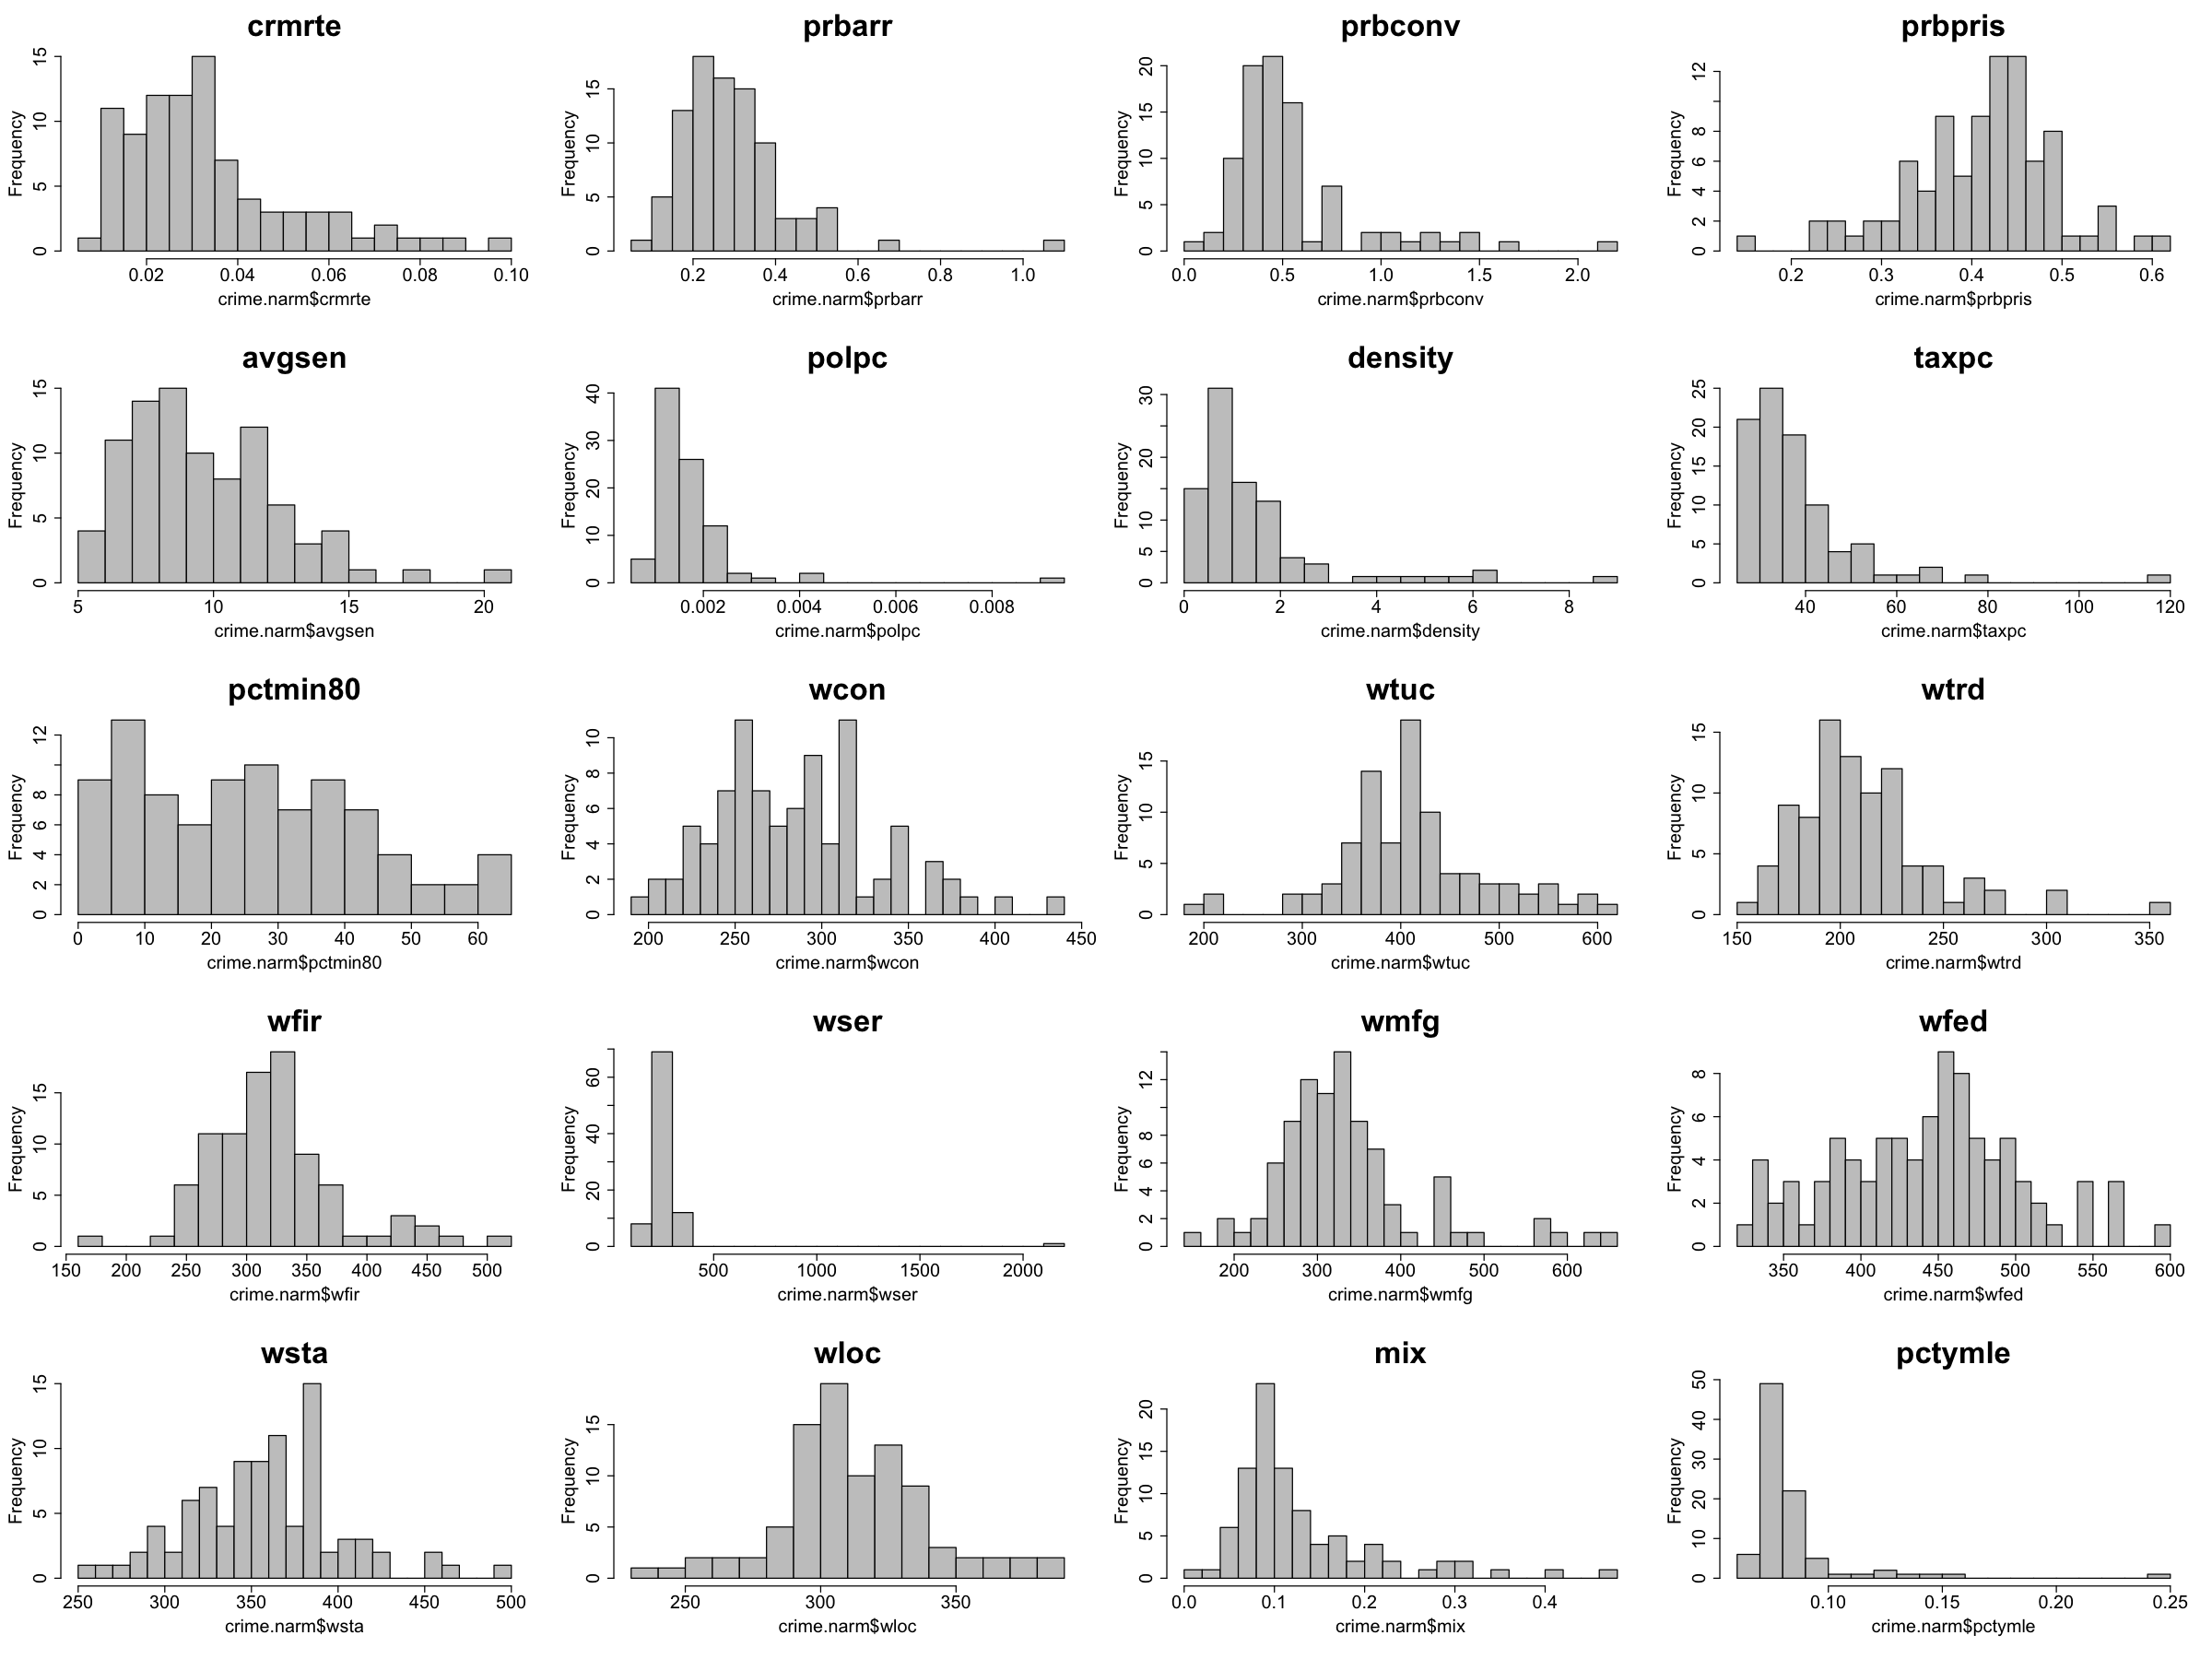

In [36]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
par(mfrow = c(5,4))
par(mar=c(6,5,4,2))
hist(crime.narm$crmrte,breaks=20, main = "crmrte",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$prbarr,breaks=20, main = "prbarr",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$prbconv,breaks=20, main = "prbconv",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$prbpris,breaks=20, main = "prbpris",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$avgsen,breaks=20, main = "avgsen",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$polpc,breaks=20, main = "polpc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$density,breaks=20, main = "density",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$taxpc,breaks=20, main = "taxpc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$pctmin80,breaks=20, main = "pctmin80",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wcon,breaks=20, main = "wcon",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wtuc,breaks=20, main = "wtuc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wtrd,breaks=20, main = "wtrd",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wfir,breaks=20, main = "wfir",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wser,breaks=20, main = "wser",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wmfg,breaks=20, main = "wmfg",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wfed,breaks=20, main = "wfed",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wsta,breaks=20, main = "wsta",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$wloc,breaks=20, main = "wloc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$mix,breaks=20, main = "mix",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(crime.narm$pctymle,breaks=20, main = "pctymle",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")

**Figure A2: Distributions of variables after log-transformation**
  * Note that log-transformation resolved most instances of non-symetric distributions

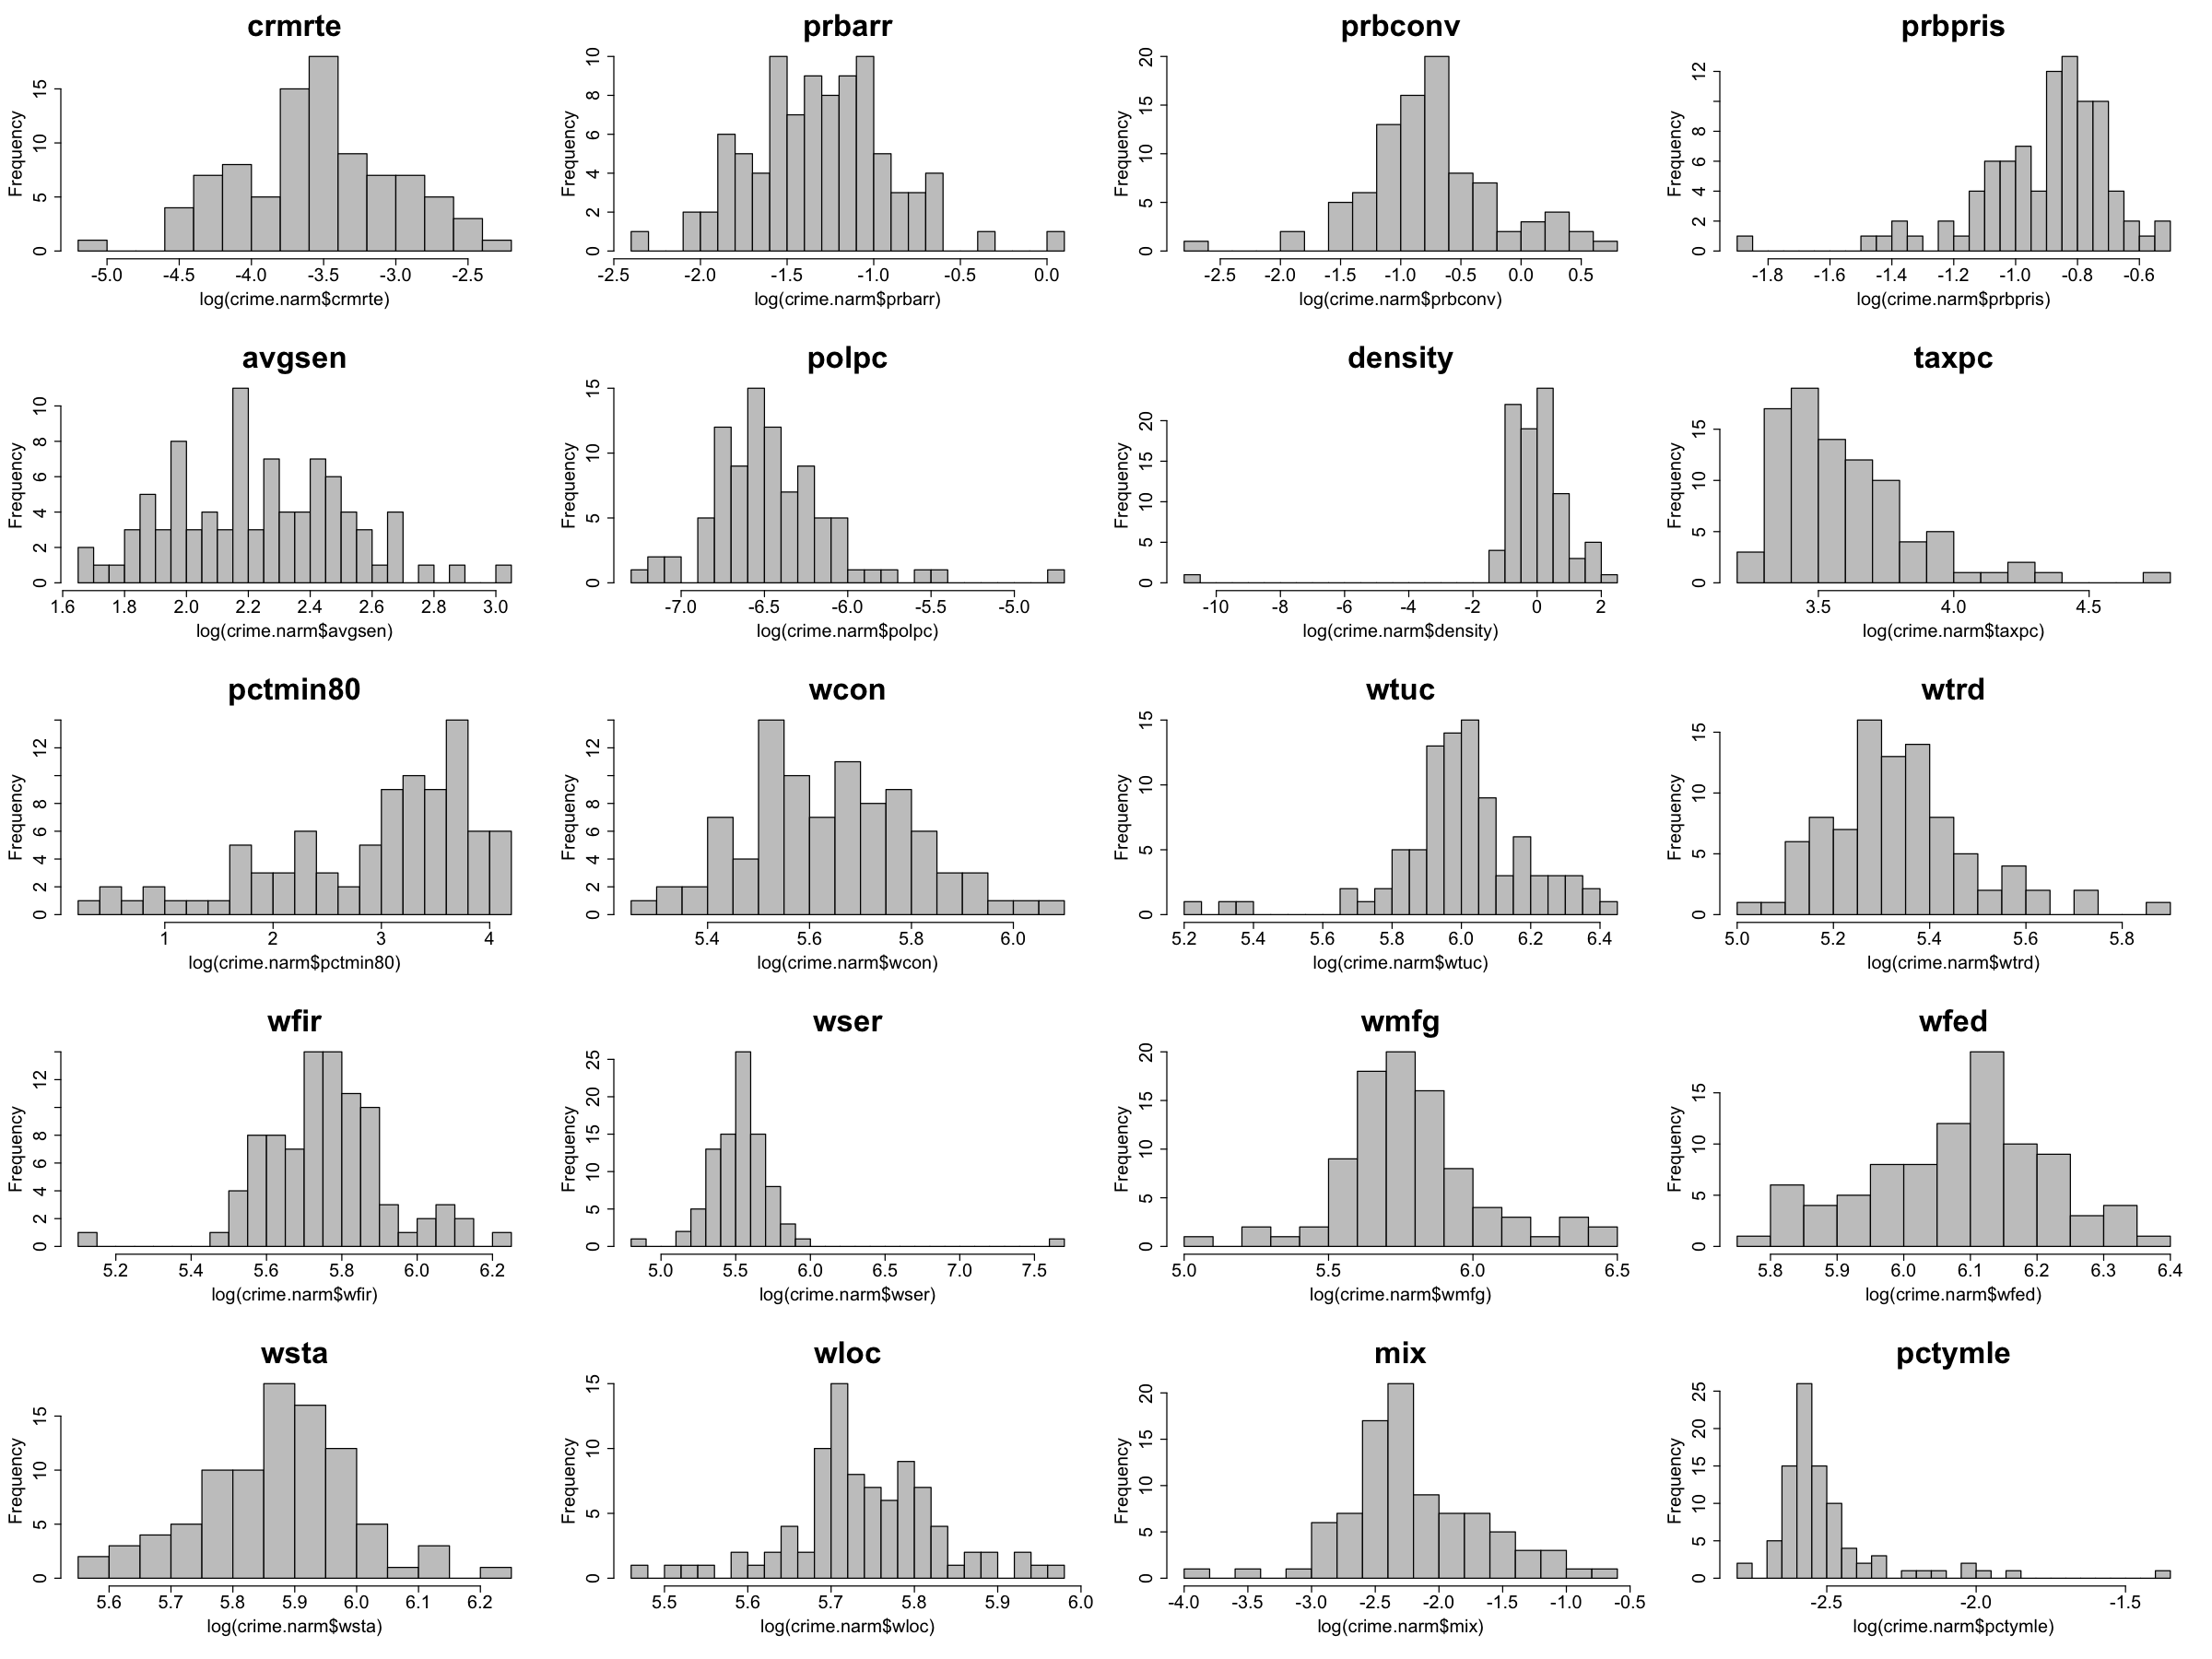

In [56]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
par(mfrow = c(5,4))
par(mar=c(6,5,4,2))
hist(log(crime.narm$crmrte),breaks=20, main = "crmrte",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$prbarr),breaks=20, main = "prbarr",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$prbconv),breaks=20, main = "prbconv",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$prbpris),breaks=20, main = "prbpris",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$avgsen),breaks=20, main = "avgsen",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$polpc),breaks=20, main = "polpc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$density),breaks=20, main = "density",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$taxpc),breaks=20, main = "taxpc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$pctmin80),breaks=20, main = "pctmin80",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wcon),breaks=20, main = "wcon",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wtuc),breaks=20, main = "wtuc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wtrd),breaks=20, main = "wtrd",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wfir),breaks=20, main = "wfir",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wser),breaks=20, main = "wser",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wmfg),breaks=20, main = "wmfg",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wfed),breaks=20, main = "wfed",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wsta),breaks=20, main = "wsta",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$wloc),breaks=20, main = "wloc",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$mix),breaks=20, main = "mix",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")
hist(log(crime.narm$pctymle),breaks=20, main = "pctymle",cex.lab=1.5,cex.main=2.5,cex.axis=1.5,col="grey78")

**Correlations between dependent variable (*crmrte*) and independent variables**

**Figure A3: Crime and geography**
* Note that (i) there is no perfect collinearity between the explanatory variables (ii) log(*density*) is clearly related to log(*crmrte*).

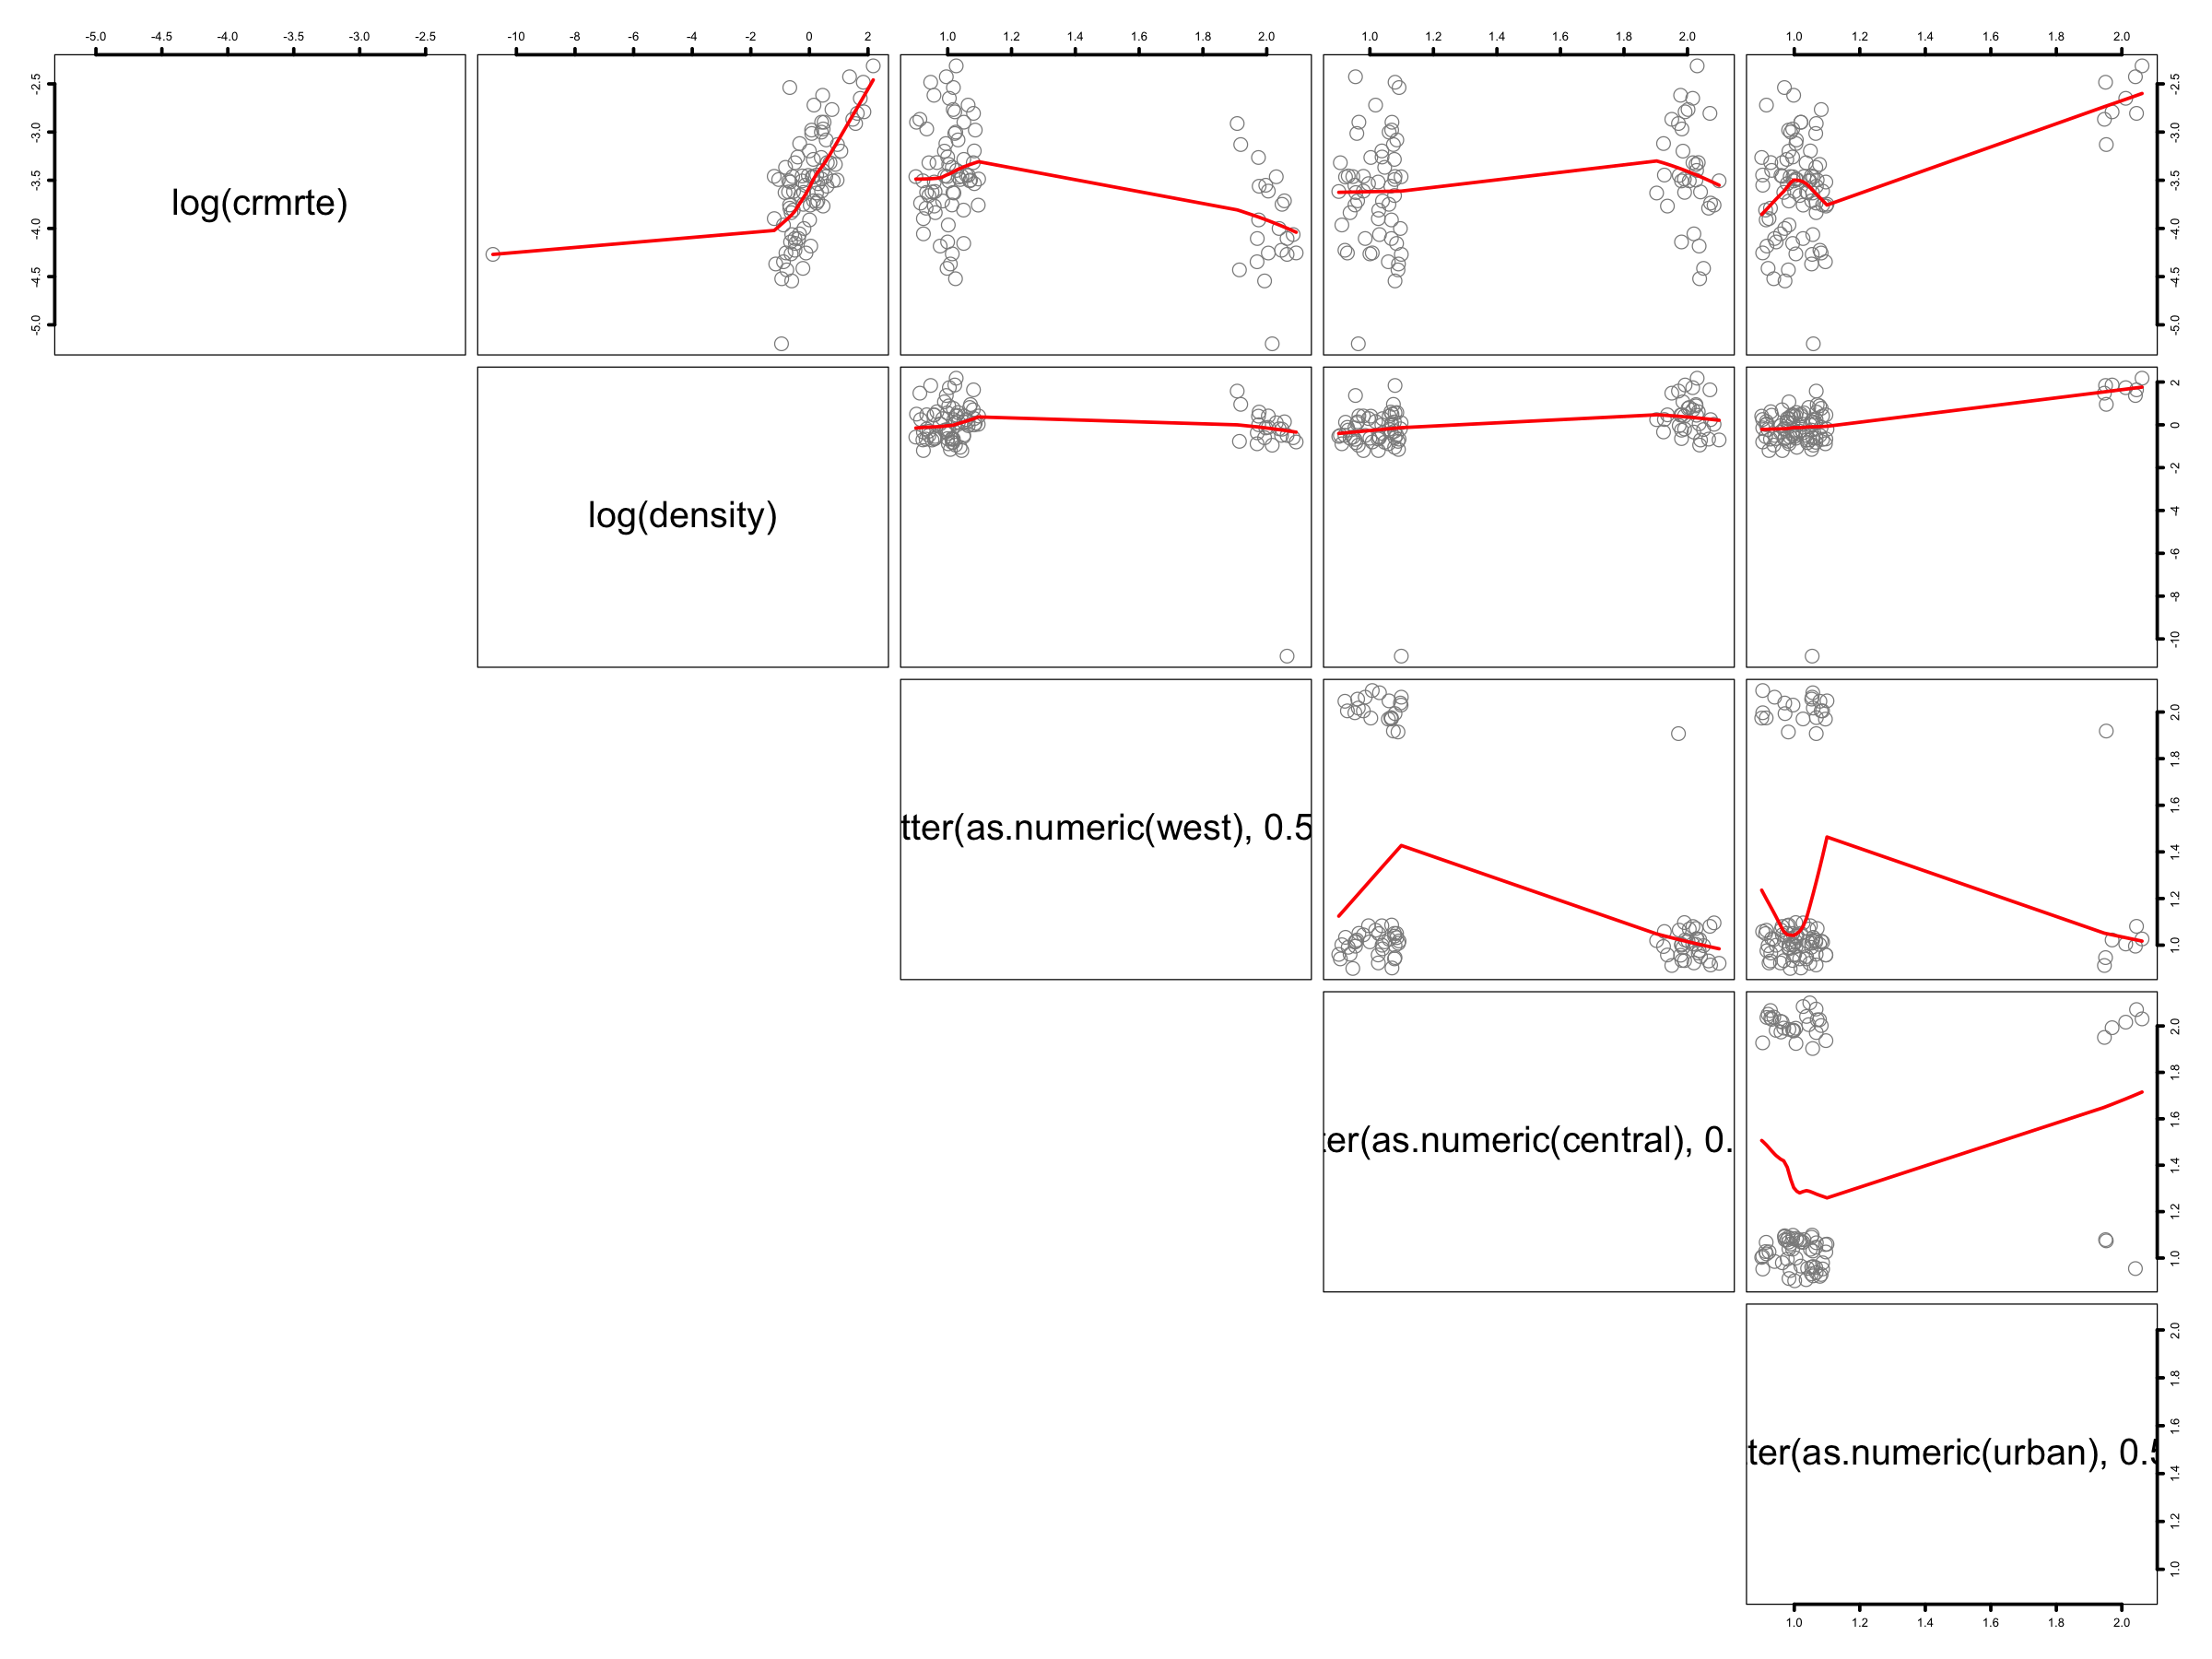

In [45]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
pairs(~log(crmrte)
      + log(density)
      + jitter(as.numeric(west),0.5)
      + jitter(as.numeric(central),0.5)
      + jitter(as.numeric(urban),0.5),
      data = crime.narm,
      cex.labels=3, lower.panel = NULL,
      upper.panel=panel.smooth,
      pch=1,cex=3,lwd=3,col="grey55")

**Figure A4: Crime and demographics**
* Note that (i) there is no perfect collinearity between the explanatory variables (ii) log(*polpc*) is clearly related to log(*crmrte*).

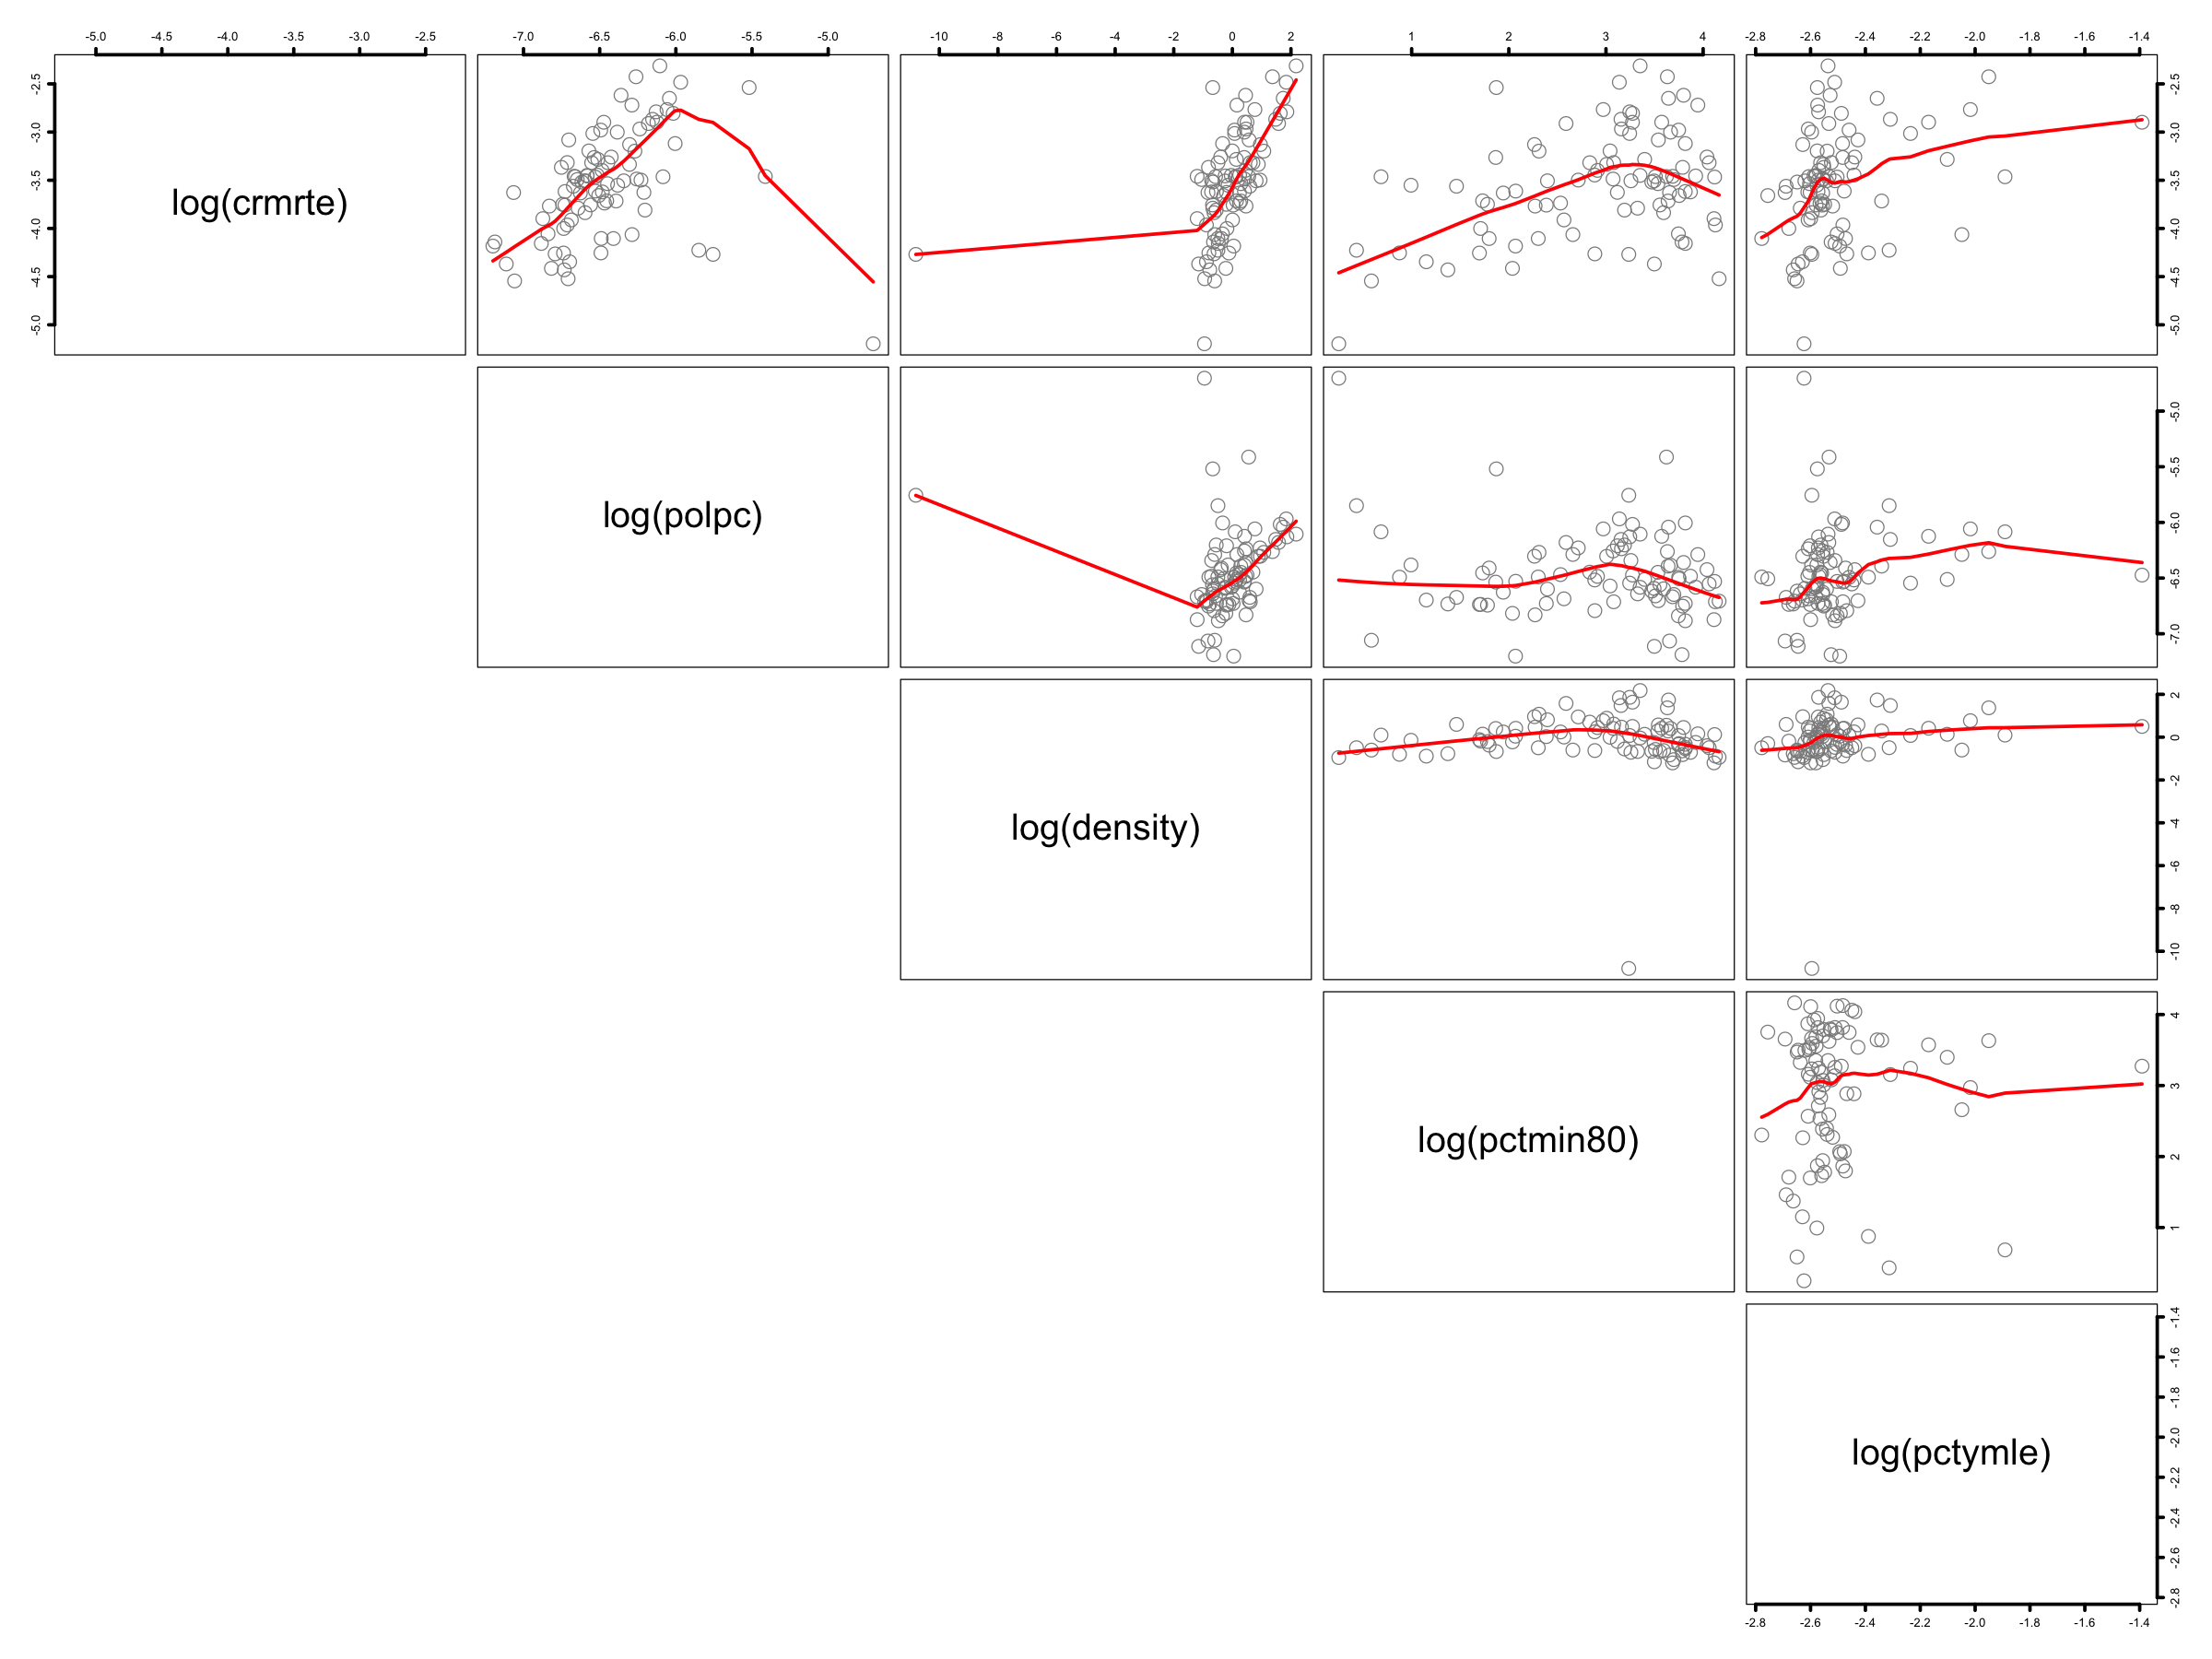

In [46]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
pairs(~log(crmrte)
      + log(polpc)
      + log(density)
      + log(pctmin80)
      + log(pctymle),
      data = crime.narm,
      cex.labels=3, lower.panel = NULL,
      upper.panel=panel.smooth,
      pch=1,cex=3,lwd=3,col="grey55")

**Figure A5: Crime and economics**
* Note that (i) there is no perfect collinearity between the explanatory variables (ii) log(*wfed*), log(*wcon*), and log(*wmfg*) are clearly related to log(*crmrte*).

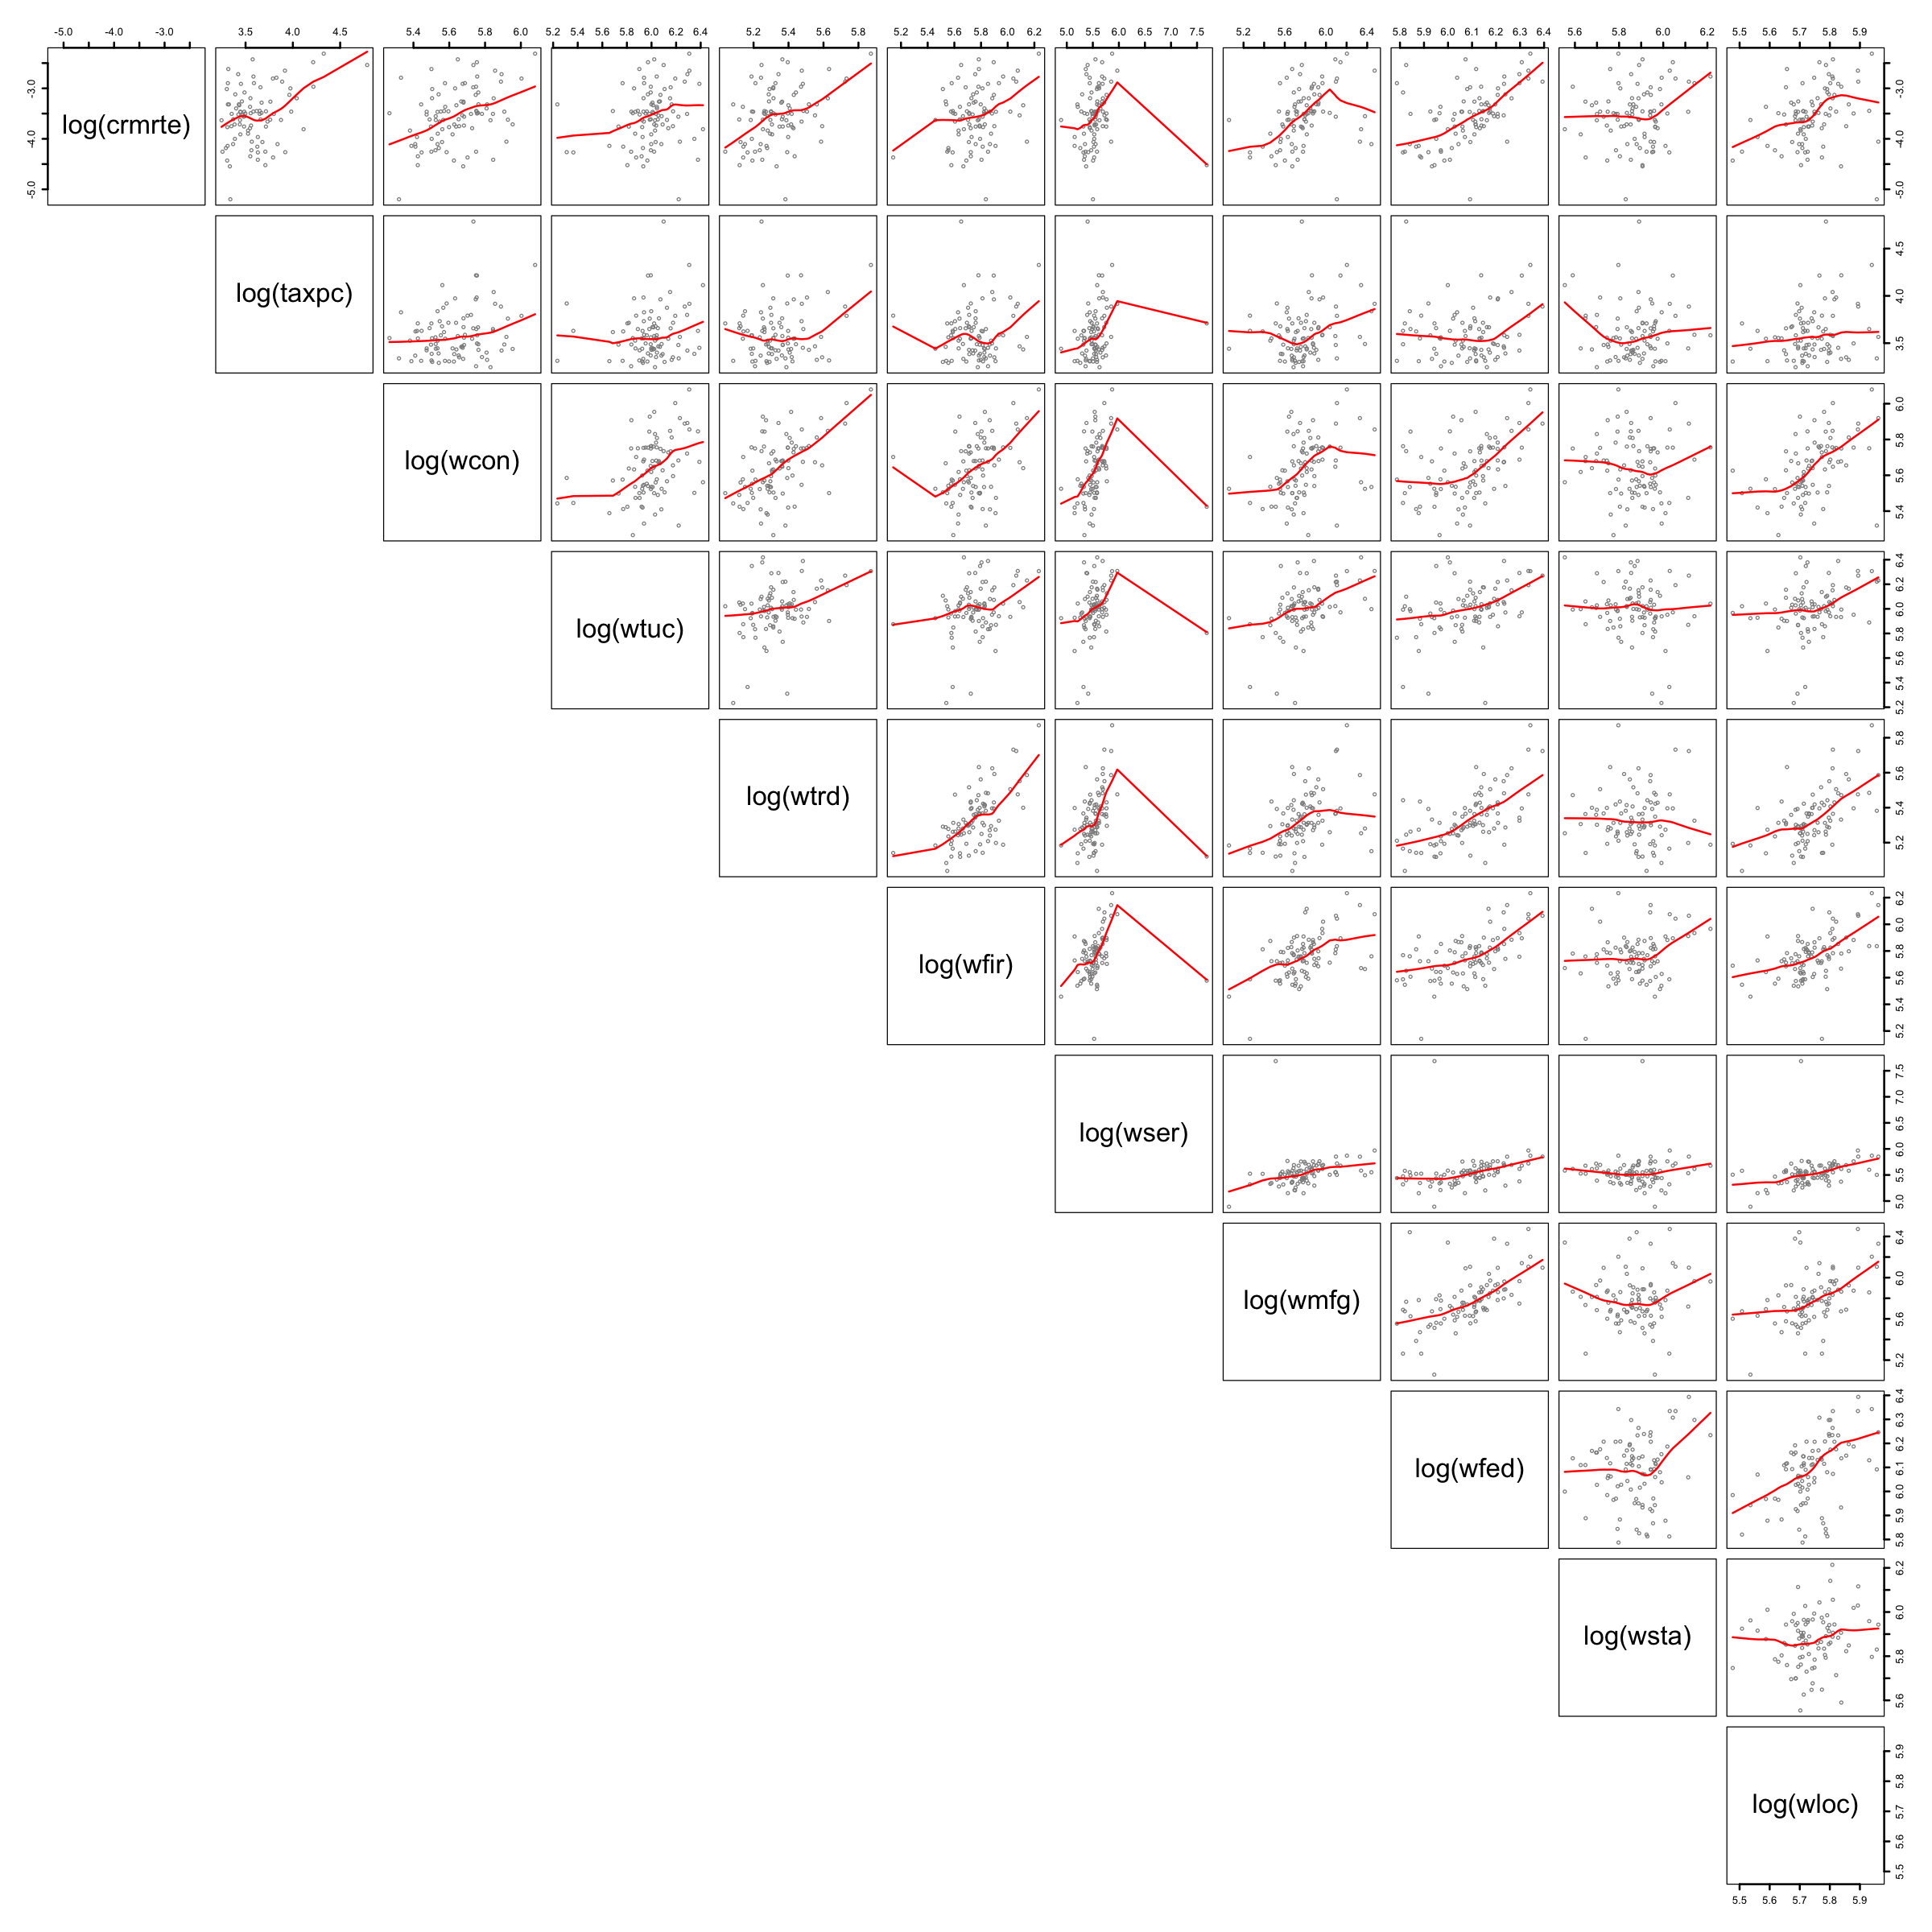

In [47]:
options(repr.plot.height = 20, repr.plot.width = 20, repr.plot.pointsize = 10)
pairs(~log(crmrte) 
      + log(taxpc)
      + log(wcon)
      + log(wtuc)
      + log(wtrd)
      + log(wfir)
      + log(wser)
      + log(wmfg)
      + log(wfed)
      + log(wsta)
      + log(wloc),
      data = crime.narm,
      cex.labels=2.5, lower.panel = NULL,
      upper.panel=panel.smooth,
      pch=1,cex=0.8,lwd=2,col="grey55")

**Figure A6: Crime and propensity to commit crime, be arrested, and sentence lengths**
* Note that (i) there is no perfect collinearity between the explanatory variables (ii) log(*prbarr*) and log(*prconv*) are clearly related to log(*crmrte*).

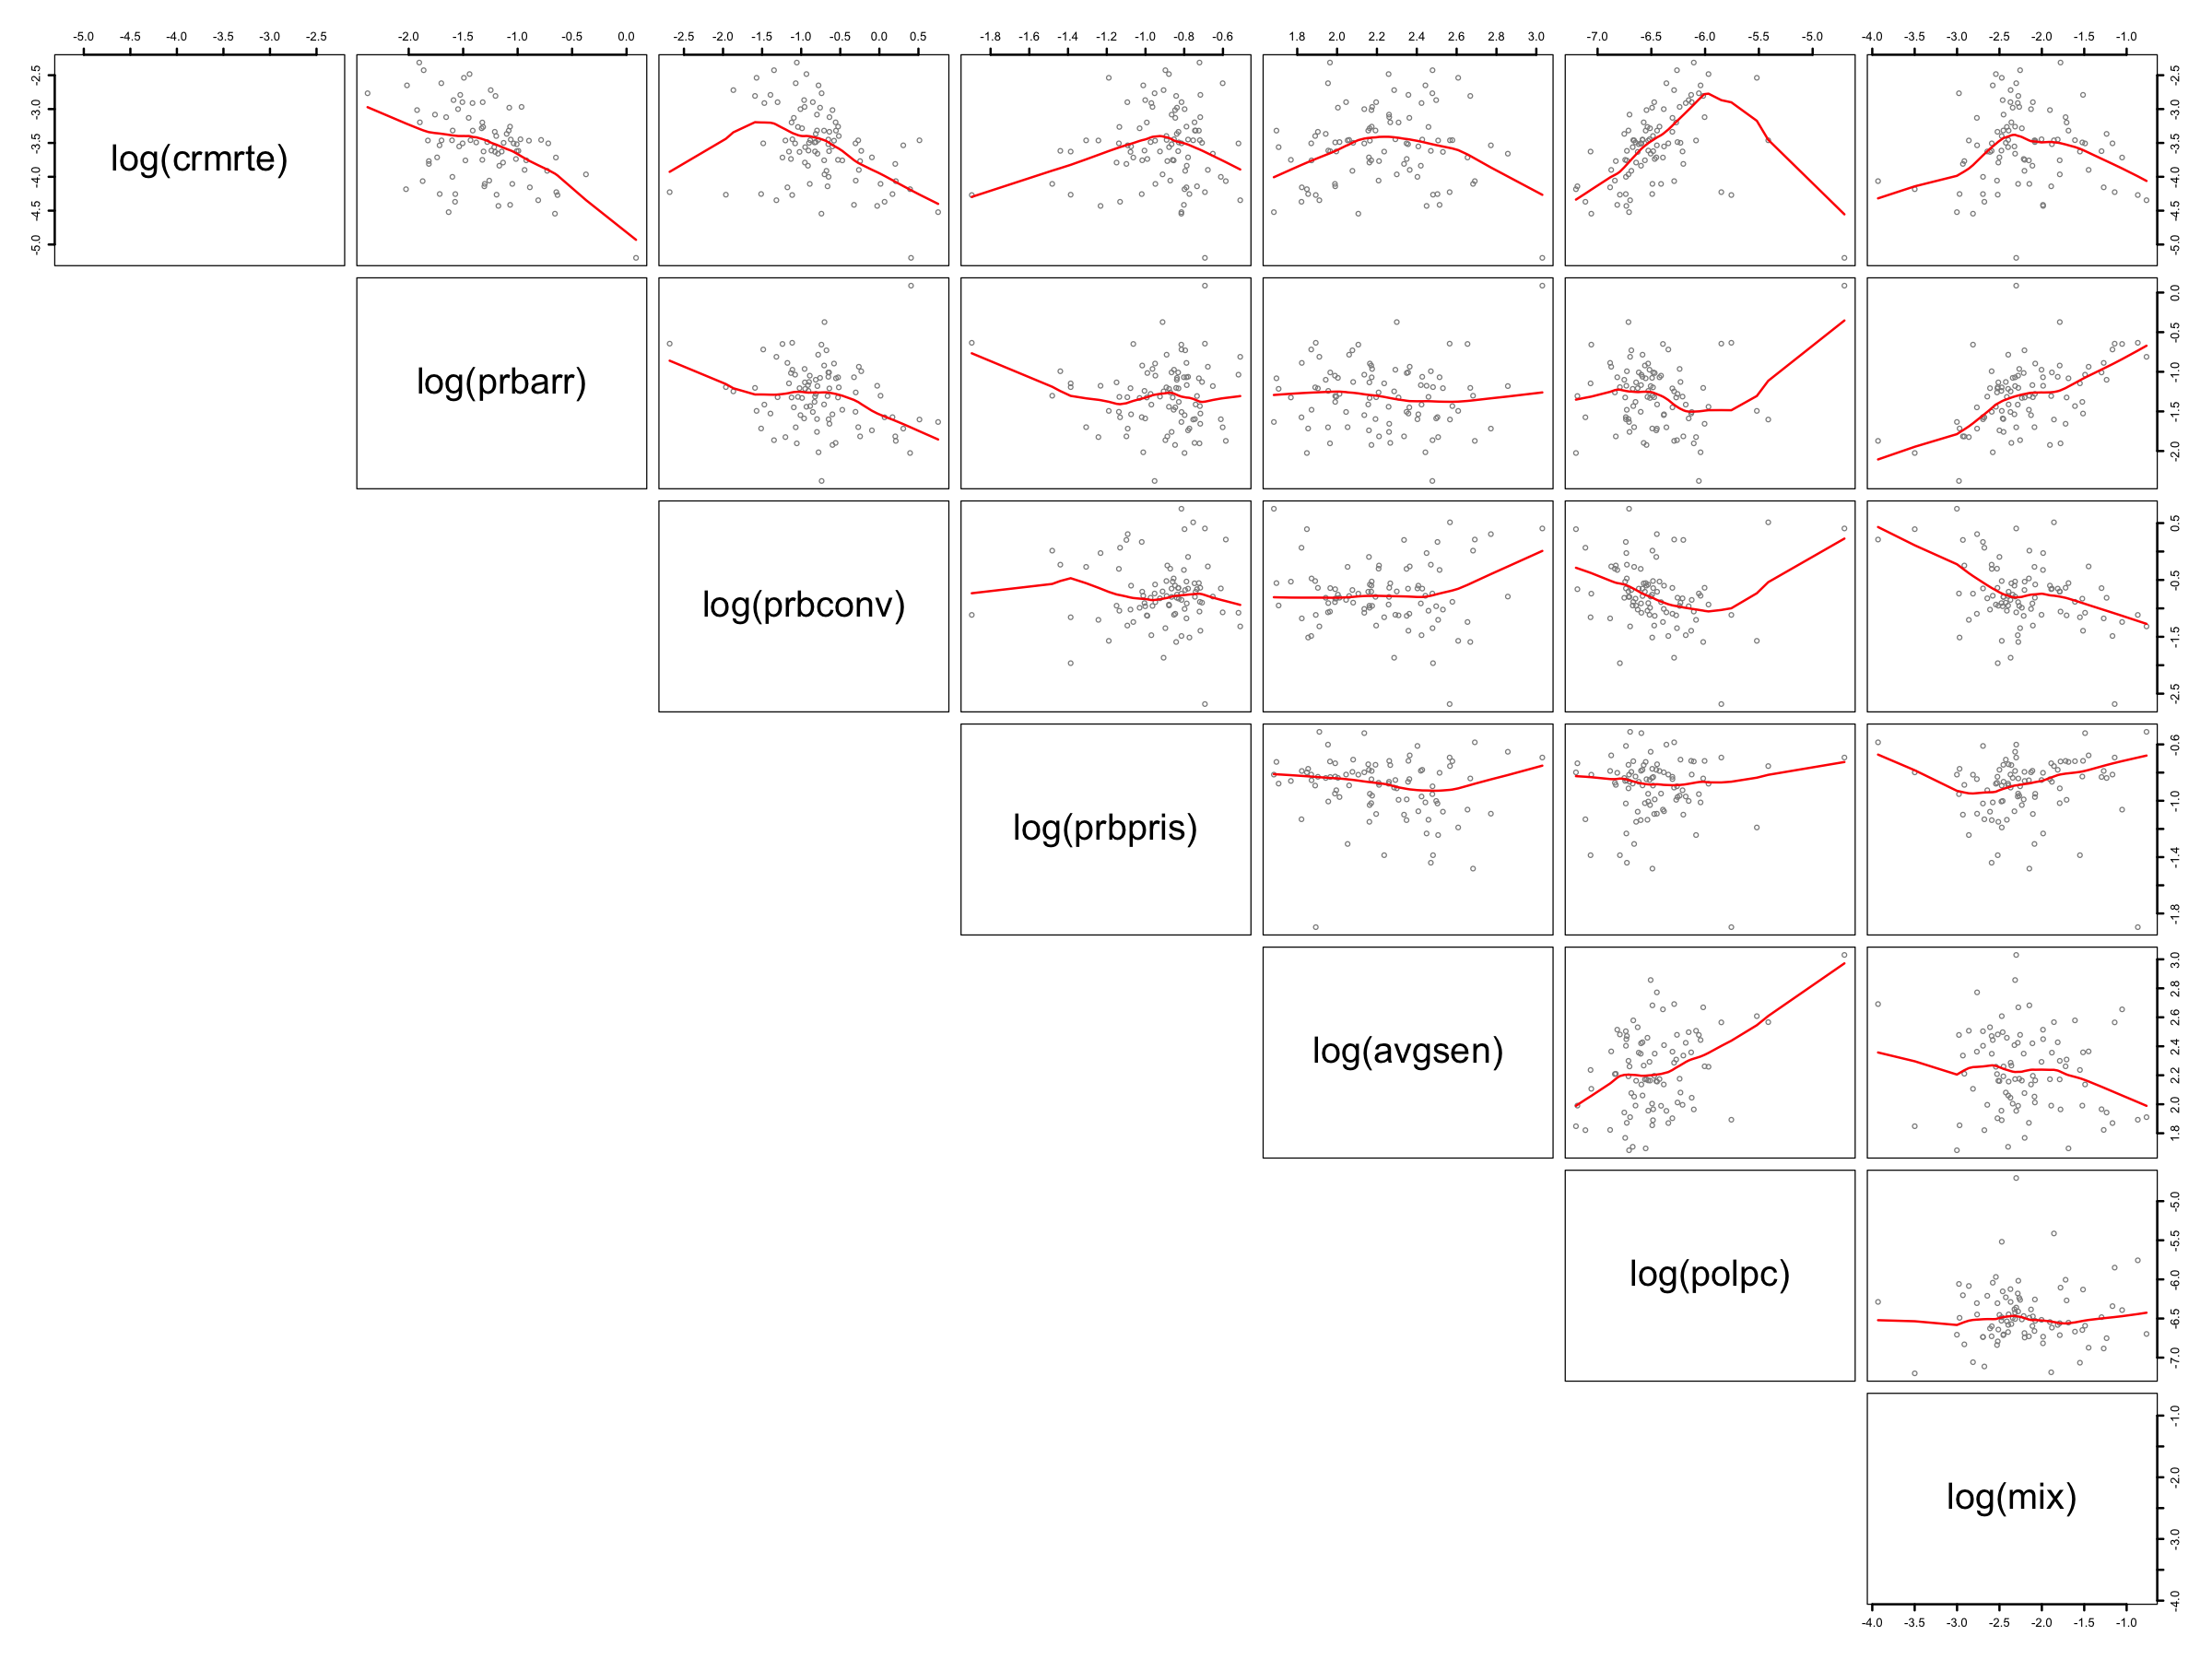

In [48]:
options(repr.plot.height = 15, repr.plot.width = 20, repr.plot.pointsize = 10)
pairs(~log(crmrte)
      + log(prbarr)
      + log(prbconv)
      + log(prbpris)
      + log(avgsen)
      + log(polpc)
      + log(mix),
      data = crime.narm,
      cex.labels=3, lower.panel = NULL,
      upper.panel=panel.smooth,
      pch=1,cex=1,lwd=2,col="grey55")

## Outliers

Given that these observations may be influential in future models, future investigation is in order.

> Observation 79: note that the *density* is extremely low. There are $\frac{0.00002\; people}{sq\;mile}$ in county 173! 

In [64]:
subset(crime.narm, log(crime.narm$density) < -8)

county crmrte    prbarr   prbconv  prbpris avgsen polpc      density    
79 173    0.0139937 0.530435 0.327869 0.15    6.64   0.00316379 2.03422e-05
   taxpc    west ⋯ wtuc     wtrd     wfir    wser     wmfg   wfed   wsta  
79 37.72702 1    ⋯ 213.6752 175.1604 267.094 204.3792 193.01 334.44 414.68
   wloc   mix       pctymle   
79 304.32 0.4197531 0.07462687

> Observation 51: note that *polpc* is very high. There are 0.009 police per capita in county 115.

In [66]:
subset(crime.narm, log(crime.narm$polpc) > -5)

county crmrte    prbarr  prbconv prbpris avgsen polpc      density   taxpc  
51 115    0.0055332 1.09091 1.5     0.5     20.7   0.00905433 0.3858093 28.1931
   west ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed  wsta   wloc   mix
51 1    ⋯ 503.2351 217.4908 342.4658 245.2061 448.42 442.2 340.39 386.12 0.1
   pctymle   
51 0.07253495

## Identify the independent variables which show significant contribution to crime rate

**Does population density, tax revenue, and police force affect crime rate?**
* Population, goverment income

In [68]:
# the explanatory variables of key interest
mp1 <- lm(log(crmrte) ~ log(density), data = crime.narm)
mp2 <- lm(log(crmrte) ~ log(polpc), data = crime.narm)
mp3 <- lm(log(crmrte) ~ log(taxpc), data = crime.narm)

In [69]:
# Compute robust standard errors
se.mp1 = sqrt(diag(vcovHC(mp1)))
se.mp2 = sqrt(diag(vcovHC(mp2)))
se.mp3 = sqrt(diag(vcovHC(mp3)))
# We pass the standard errors into stargazer through the se argument.
stargazer(mp1, mp2, mp3, 
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.mp1, se.mp2, se.mp3),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                   Dependent variable:      
             -------------------------------
                       log(crmrte)          
                 (1)        (2)       (3)   
--------------------------------------------
log(density)    0.197                       
               (0.291)                      
                                            
log(polpc)                 0.417            
                          (0.475)           
                                            
log(taxpc)                         0.704*** 
                                    (0.207) 
                                            
Constant      -3.525***   -0.847   -6.076***
               (0.055)    (3.104)   (0.750) 
                                            
--------------------------------------------
Observations     90         90        90    
Adjusted R2     0.235      0.071     0.105  
Note:          *p<0.05; **p<0.01; ***p<0.001


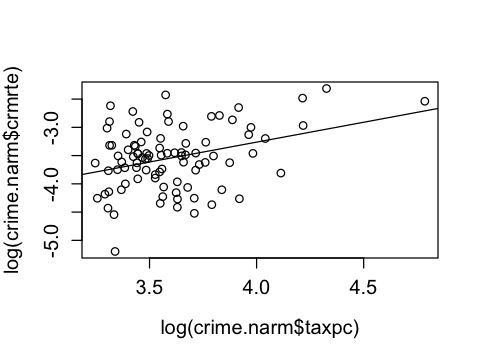

In [70]:
# check correlation between dependent variable and independent variables
options(repr.plot.height = 3, repr.plot.width = 4, repr.plot.pointsize = 10)
plot(log(crime.narm$taxpc), log(crime.narm$crmrte))
abline(mp3)

> In the category of population and goverment income, *taxpc* significantly affects crime rate with positive correlation.

**Does income affect crime rate?**
* Employee incomes

In [72]:
me1  <- lm(log(crmrte) ~ log(wcon), data = crime.narm)
me2  <- lm(log(crmrte) ~ log(wtuc), data = crime.narm)
me3  <- lm(log(crmrte) ~ log(wtrd), data = crime.narm)
me4  <- lm(log(crmrte) ~ log(wfir), data = crime.narm)
me5  <- lm(log(crmrte) ~ log(wser), data = crime.narm)
me6  <- lm(log(crmrte) ~ log(wmfg), data = crime.narm)
me7  <- lm(log(crmrte) ~ log(wfed), data = crime.narm)
me8  <- lm(log(crmrte) ~ log(wsta), data = crime.narm)
me9  <- lm(log(crmrte) ~ log(wloc), data = crime.narm)

In [73]:
# Compute robust standard errors
se.me1 = sqrt(diag(vcovHC(me1)))
se.me2 = sqrt(diag(vcovHC(me2)))
se.me3 = sqrt(diag(vcovHC(me3)))
se.me4 = sqrt(diag(vcovHC(me4)))
se.me5 = sqrt(diag(vcovHC(me5)))
se.me6 = sqrt(diag(vcovHC(me6)))
se.me7 = sqrt(diag(vcovHC(me7)))
se.me8 = sqrt(diag(vcovHC(me8)))
se.me9 = sqrt(diag(vcovHC(me9)))
# We pass the standard errors into stargazer through the se argument.
stargazer(me1, me2, me3, me4, me5, me6, me7, me8, me9,
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.me1, se.me2, se.me3, se.me4, se.me5, se.me6, se.me7, se.me8, se.me9),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                                                Dependent variable:                                   
             -----------------------------------------------------------------------------------------
                                                    log(crmrte)                                       
                (1)        (2)       (3)        (4)      (5)      (6)       (7)       (8)       (9)   
------------------------------------------------------------------------------------------------------
log(wcon)     1.322***                                                                                
              (0.396)                                                                                 
                                                                                                      
log(wtuc)                 0.574                                                                       
                         (0.334)                                        

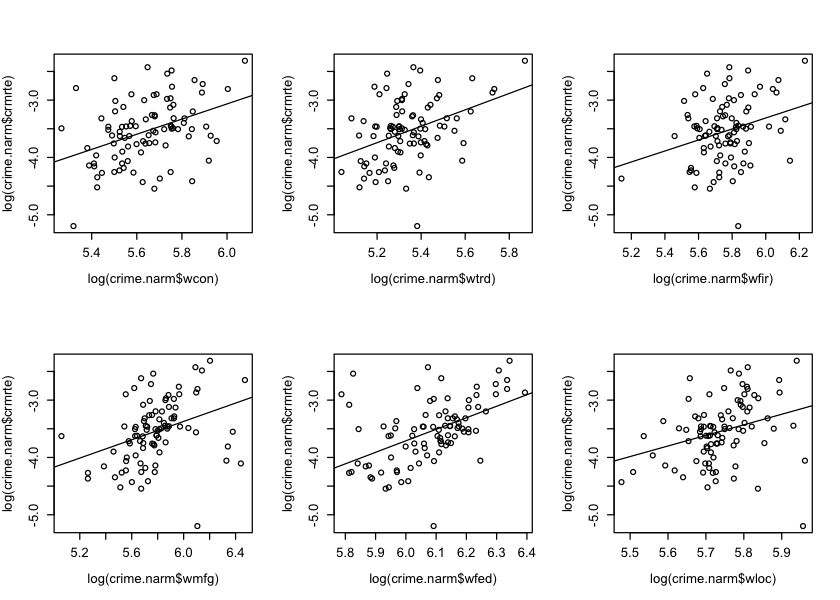

In [74]:
options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(2,3))
plot(log(crime.narm$wcon), log(crime.narm$crmrte))
abline(me1)
plot(log(crime.narm$wtrd), log(crime.narm$crmrte))
abline(me3)
plot(log(crime.narm$wfir), log(crime.narm$crmrte))
abline(me4)
plot(log(crime.narm$wmfg), log(crime.narm$crmrte))
abline(me6)
plot(log(crime.narm$wfed), log(crime.narm$crmrte))
abline(me7)
plot(log(crime.narm$wloc), log(crime.narm$crmrte))
abline(me9)

> In the category of employee income, *wcon*, *wtrd*, *wfir*, *wmfg*, *wfed*, and *wloc* significantly affect crime rate with positive correlation.

**Do young males and the percent of population that is minority affect crime rate?**
* minority and young male

In [75]:
mm1 <- lm(log(crmrte) ~ pctmin80, data = crime.narm)
mm2 <- lm(log(crmrte) ~ pctymle, data = crime.narm)

In [76]:
# Compute robust standard errors
se.mm1 = sqrt(diag(vcovHC(mm1)))
se.mm2 = sqrt(diag(vcovHC(mm2)))
# We pass the standard errors into stargazer through the se argument.
stargazer(mm1, mm2,
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.mm1, se.mm2),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                  Dependent variable:      
             ------------------------------
                      log(crmrte)          
                   (1)            (2)      
-------------------------------------------
pctmin80          0.008                    
                 (0.004)                   
                                           
pctymle                          6.509     
                                (3.739)    
                                           
Constant        -3.735***      -4.089***   
                 (0.115)        (0.311)    
                                           
-------------------------------------------
Observations       90              90      
Adjusted R2       0.044          0.067     
Note:         *p<0.05; **p<0.01; ***p<0.001


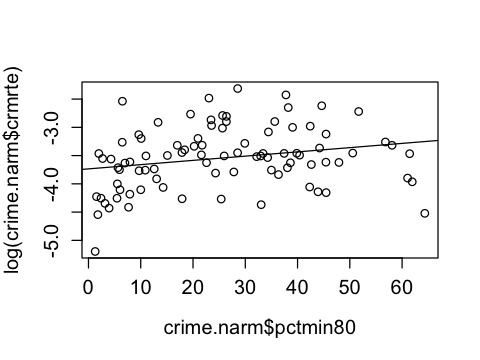

In [77]:
options(repr.plot.height = 3, repr.plot.width = 4, repr.plot.pointsize = 10)
plot(crime.narm$pctmin80, log(crime.narm$crmrte))
abline(mm1)

> In the category of minority and young male, *pctmin80* significantly affects crime rate with positive correlation.

**Does geographic location affect crime rate?**
* geographic factors

In [78]:
mg1 <- lm(log(crmrte) ~ factor(west), data = crime.narm)
mg2 <- lm(log(crmrte) ~ factor(central), data = crime.narm)
mg3 <- lm(log(crmrte) ~ factor(urban), data = crime.narm)

In [79]:
# Compute robust standard errors
se.mg1 = sqrt(diag(vcovHC(mg1)))
se.mg2 = sqrt(diag(vcovHC(mg2)))
se.mg3 = sqrt(diag(vcovHC(mg3)))
# We pass the standard errors into stargazer through the se argument.
stargazer(mg1, mg2, mg3,
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.mg1, se.mg2, se.mg3),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                       Dependent variable:      
                 -------------------------------
                           log(crmrte)          
                    (1)        (2)        (3)   
------------------------------------------------
factor(west)1    -0.526***                      
                  (0.129)                       
                                                
factor(central)1              0.208             
                             (0.118)            
                                                
factor(urban)1                         0.942*** 
                                        (0.115) 
                                                
Constant         -3.413***  -3.620***  -3.625***
                  (0.061)    (0.075)    (0.055) 
                                                
------------------------------------------------
Observations         90         90        90    
Adjusted R2        0.162      0.023      0.233  
Note:              

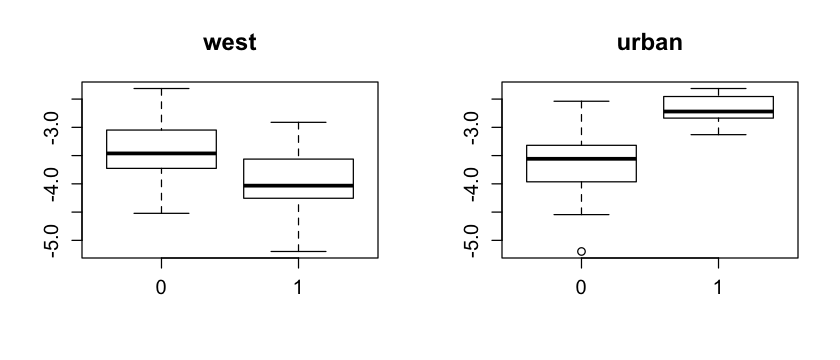

In [80]:
options(repr.plot.height = 3, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(1,2))
plot(factor(crime.narm$west), log(crime.narm$crmrte), main = "west")
plot(factor(crime.narm$urban), log(crime.narm$crmrte), main = "urban")

> In the category of geographic factors, *west* significantly affects crime rate with negative correlation. On the other hand, *urban* significantly affects crime rate with positive correlation

**Do outcomes of crime affect crime rate?**
* crime outcomes

In [82]:
mc1 <- lm(log(crmrte) ~ log(prbarr), data = crime.narm)
mc2 <- lm(log(crmrte) ~ log(prbconv), data = crime.narm)
mc3 <- lm(log(crmrte) ~ log(prbpris), data = crime.narm)
mc4 <- lm(log(crmrte) ~ log(avgsen), data = crime.narm)
mc5 <- lm(log(crmrte) ~ log(mix), data = crime.narm)

In [83]:
# Compute robust standard errors
se.mc1 = sqrt(diag(vcovHC(mc1)))
se.mc2 = sqrt(diag(vcovHC(mc2)))
se.mc3 = sqrt(diag(vcovHC(mc3)))
se.mc4 = sqrt(diag(vcovHC(mc4)))
se.mc5 = sqrt(diag(vcovHC(mc5)))
# We pass the standard errors into stargazer through the se argument.
stargazer(mc1, mc2, mc3, mc4, mc5, 
          type="text", keep.stat=c("n", "adj.rsq"),
          se = list(se.mc1, se.mc2, se.mc3, se.mc4, se.mc5),
          star.cutoffs=c(0.05, 0.01, 0.001)
         )


                            Dependent variable:               
             -------------------------------------------------
                                log(crmrte)                   
                (1)       (2)       (3)       (4)       (5)   
--------------------------------------------------------------
log(prbarr)  -0.594***                                        
              (0.156)                                         
                                                              
log(prbconv)            -0.366*                               
                        (0.158)                               
                                                              
log(prbpris)                       0.172                      
                                  (0.287)                     
                                                              
log(avgsen)                                  0.046            
                                            (0.294)   

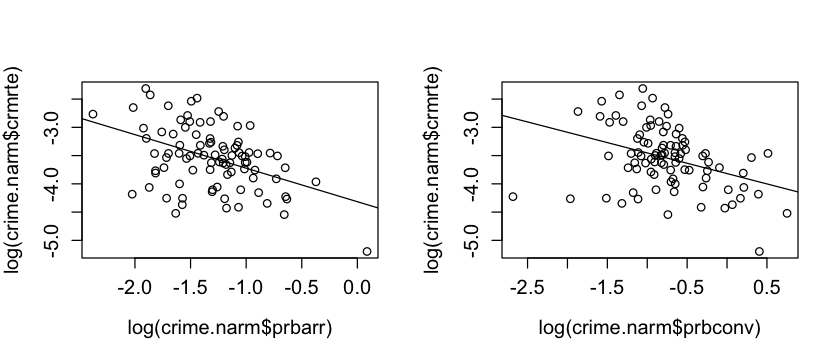

In [84]:
options(repr.plot.height = 3, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(1,2))
plot(log(crime.narm$prbarr), log(crime.narm$crmrte))
abline(mc1)
plot(log(crime.narm$prbconv), log(crime.narm$crmrte))
abline(mc2)

> In the category of geographic factors, *prbarr* and *prbconv* significantly affect crime rate with negative correlation.

**Test the regression model based on the variables with related characteristics** 

In [41]:
mp4 <- lm(log(crmrte) ~ log(density) + log(polpc)
          + log(taxpc), data = crime.narm)
me10 <- lm(log(crmrte) ~ log(wcon) + log(wtuc) + log(wtrd) +
         log(wfir) + log(wser) + log(wmfg) + log(wfed) +
         log(wsta) + log(wloc), data = crime.narm)
mm3 <- lm(log(crmrte) ~ pctmin80 + pctymle, data = crime.narm)
mg4 <- lm(log(crmrte) ~ factor(west) + factor(central) + factor(urban), data = crime.narm)
mc6 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) +
         log(prbpris) + log(avgsen) + log(mix), data = crime.narm)

paste("adj.r.squared of population and goverment income: ", summary(mp4)$adj.r.squared)
paste("adj.r.squared of employee income: ", summary(me10)$adj.r.squared)
paste("adj.r.squared of minority and young male: ", summary(mm3)$adj.r.squared)
paste("adj.r.squared of geographic factors: ", summary(mg4)$adj.r.squared)
paste("adj.r.squared of crime outcomes: ", summary(mc6)$adj.r.squared)

[1] "adj.r.squared of population and goverment income:  0.335445808769382"

[1] "adj.r.squared of employee income:  0.255168337418916"

[1] "adj.r.squared of minority and young male:  0.114261587697344"

[1] "adj.r.squared of geographic factors:  0.360644623908643"

[1] "adj.r.squared of crime outcomes:  0.396489655078683"

> The OLS model of population and goverment income varibales shows adjusted $R^2=0.335$. The OLS model of employee income varibales shows adjusted $R^2=0.255$. The OLS model of minority and young male varibales shows adjusted $R^2=0.114$. The OLS model of geographic factors varibales shows adjusted $R^2=0.361$. The OLS model of crime outcomes varibales shows adjusted $R^2=0.396$. Therefore, the OLS models based on the categories do not provide competitive explanations of the variation in *crmrte*.